In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib.pylab import figure, gca, gcf, show, colorbar, close
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# My favorite colormaps
WhBu = matplotlib.colors.LinearSegmentedColormap.from_list( 'WhBu', [[1,1,1,0],[0,.15,.4,1]], N=256, gamma=1.0)
RdWhBu = matplotlib.colors.LinearSegmentedColormap.from_list( 'RdWhBu', [[.4,.15,0,1],[1,1,1,0],[0,.15,.4,1]], N=256, gamma=1.0)
matplotlib.colormaps.register( cmap=WhBu, force=True)
matplotlib.colormaps.register( cmap=RdWhBu, force=True)
matplotlib.pylab.rc( 'image', cmap='WhBu')

# Force redraw of figure to facilitate animations
def drawnow():
    from matplotlib.pyplot import show
    from IPython.display import clear_output
    clear_output( wait=True)
    show()

from IPython.display import clear_output    

def soundsc( s, r=16000, name='', normalize=True):
    from IPython.display import display, Audio, HTML
    display( HTML( 
    '<style> table, th, td {border: 0px; }</style> <table><tr><td>' + 
        Audio( s, rate=r, normalize=normalize)._repr_html_()[3:] + '</td><td>' + name + '</td></tr></table>'
    ))

# from torch import *
# from torch.fft import *
import torch
import torchaudio

import random

from tqdm import trange
from scipy.signal import welch
from time import time

from matplotlib import pyplot as plt
import matplotlib.colors as colors

import fluidsynth

import textwrap

import thop
import numpy as np

try:
    del range, int, float # to avoid shadowing these built-ins
    del min, max
except NameError:
    pass

device = 'cuda:0'

import combnet

(0.0, 2000.0)

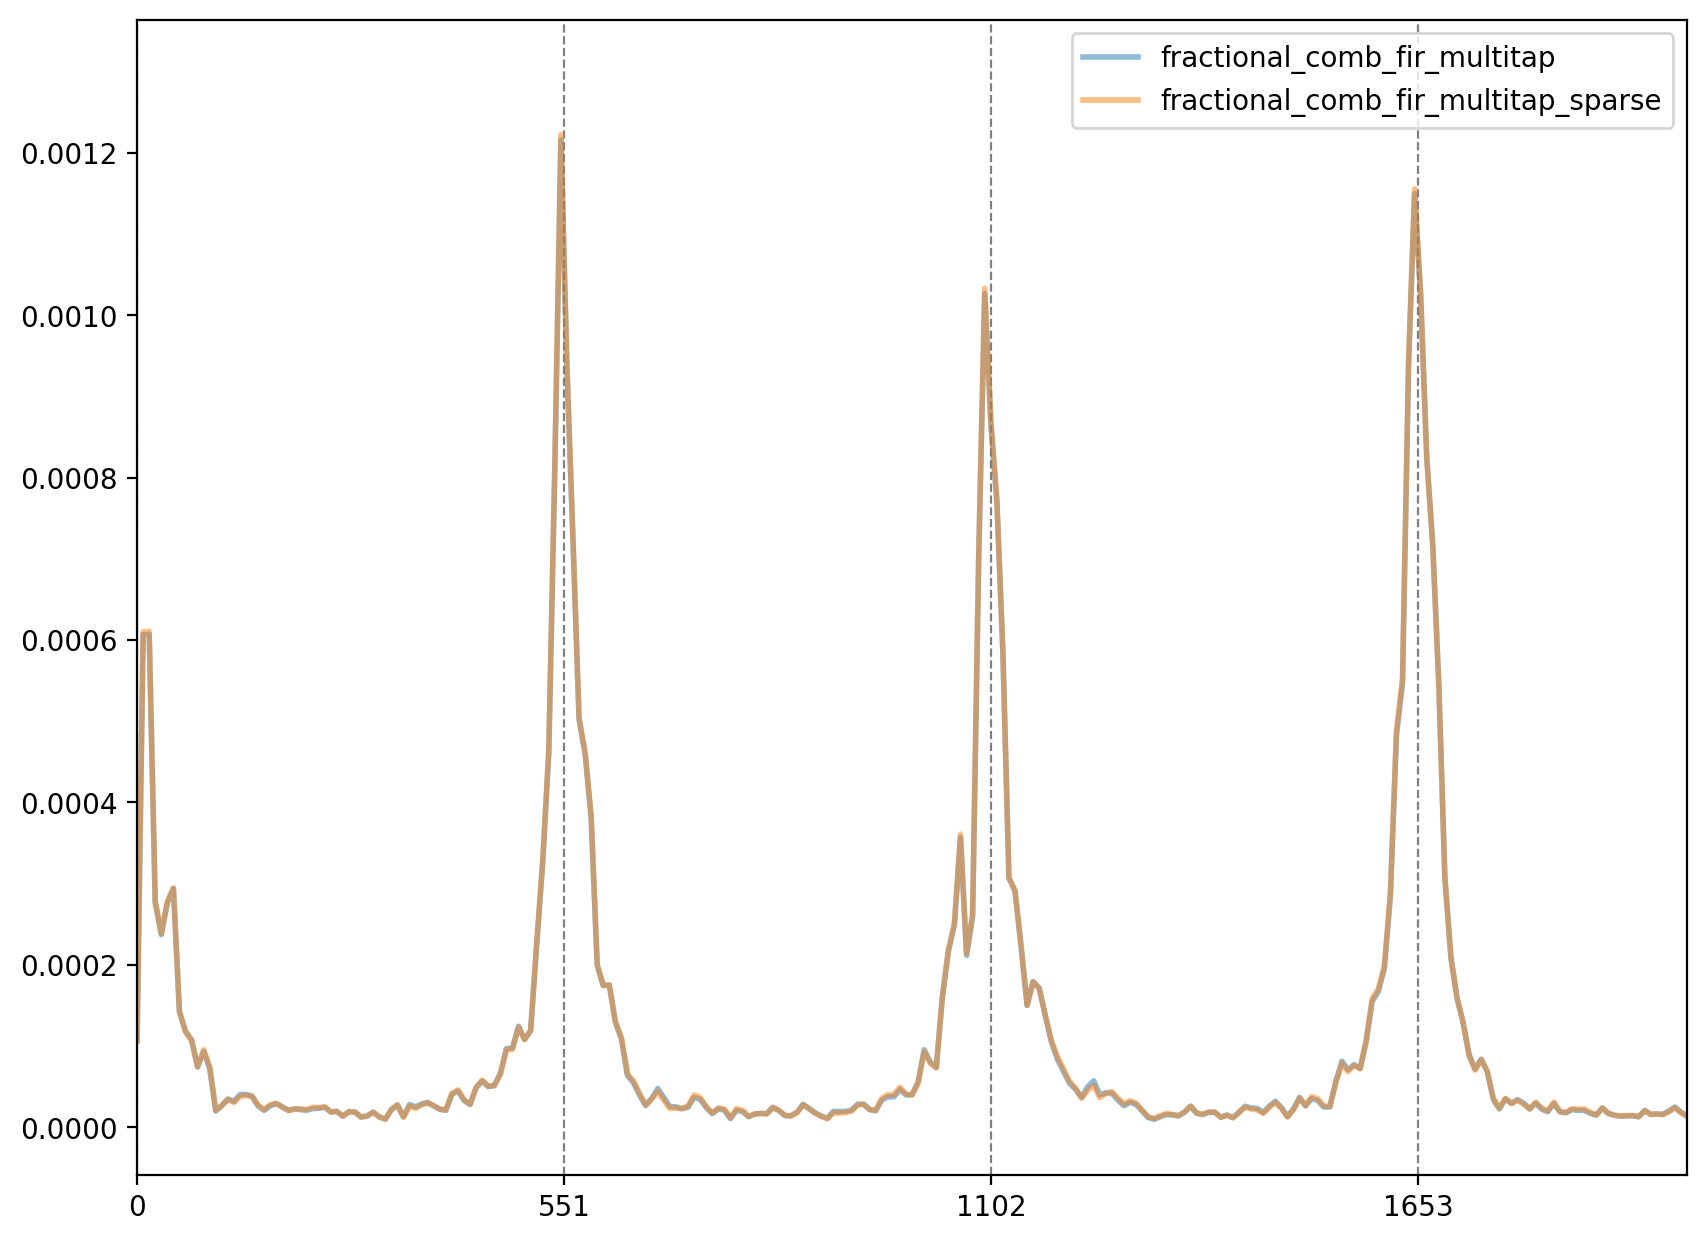

In [11]:
# Input to apply this on
sr = 16000
x = torch.randn(sr).unsqueeze(0)
# x = zeros( sr); x[0] = 1

# Try them all out
f0,a = 151.1, .75
f0,a = 551.1, .75
# f0,a = 550, .75
# f0,a = 500, .75

candidates = [
    # combnet.filters.single_fractional_comb_fiir,
    # combnet.filters.single_fractional_comb_iir_faithful,
    # combnet.filters.single_comb_iir_faithful,
    # combnet.filters.single_comb_iir_fast,
    # combnet.filters.single_comb_fir,
    # combnet.filters.single_comb_fir_multitap,
    # combnet.filters.single_fractional_comb_diric,
    # combnet.filters.single_fractional_comb_modulo,
    # combnet.filters.single_fractional_comb_fir_multitap,
    combnet.filters.fractional_comb_fir_multitap,
    combnet.filters.fractional_comb_fir_multitap_sparse
]

for comb_fn in candidates:
    y = comb_fn( x, f0, a, sr).squeeze()
    gca().plot( *welch( y/y.std(), fs=sr, nperseg=1024*2, nfft=2048), label=comb_fn.__name__, alpha=.5, lw=2)

    
gcf().set_size_inches(10, 7.5)
gca().set_xticks(torch.arange( 0, sr//2, f0))
gca().xaxis.grid(True, linestyle='--', color='gray')
# gca().set_yscale('log')
gca().legend()
gca().set_xlim(0, 2000)

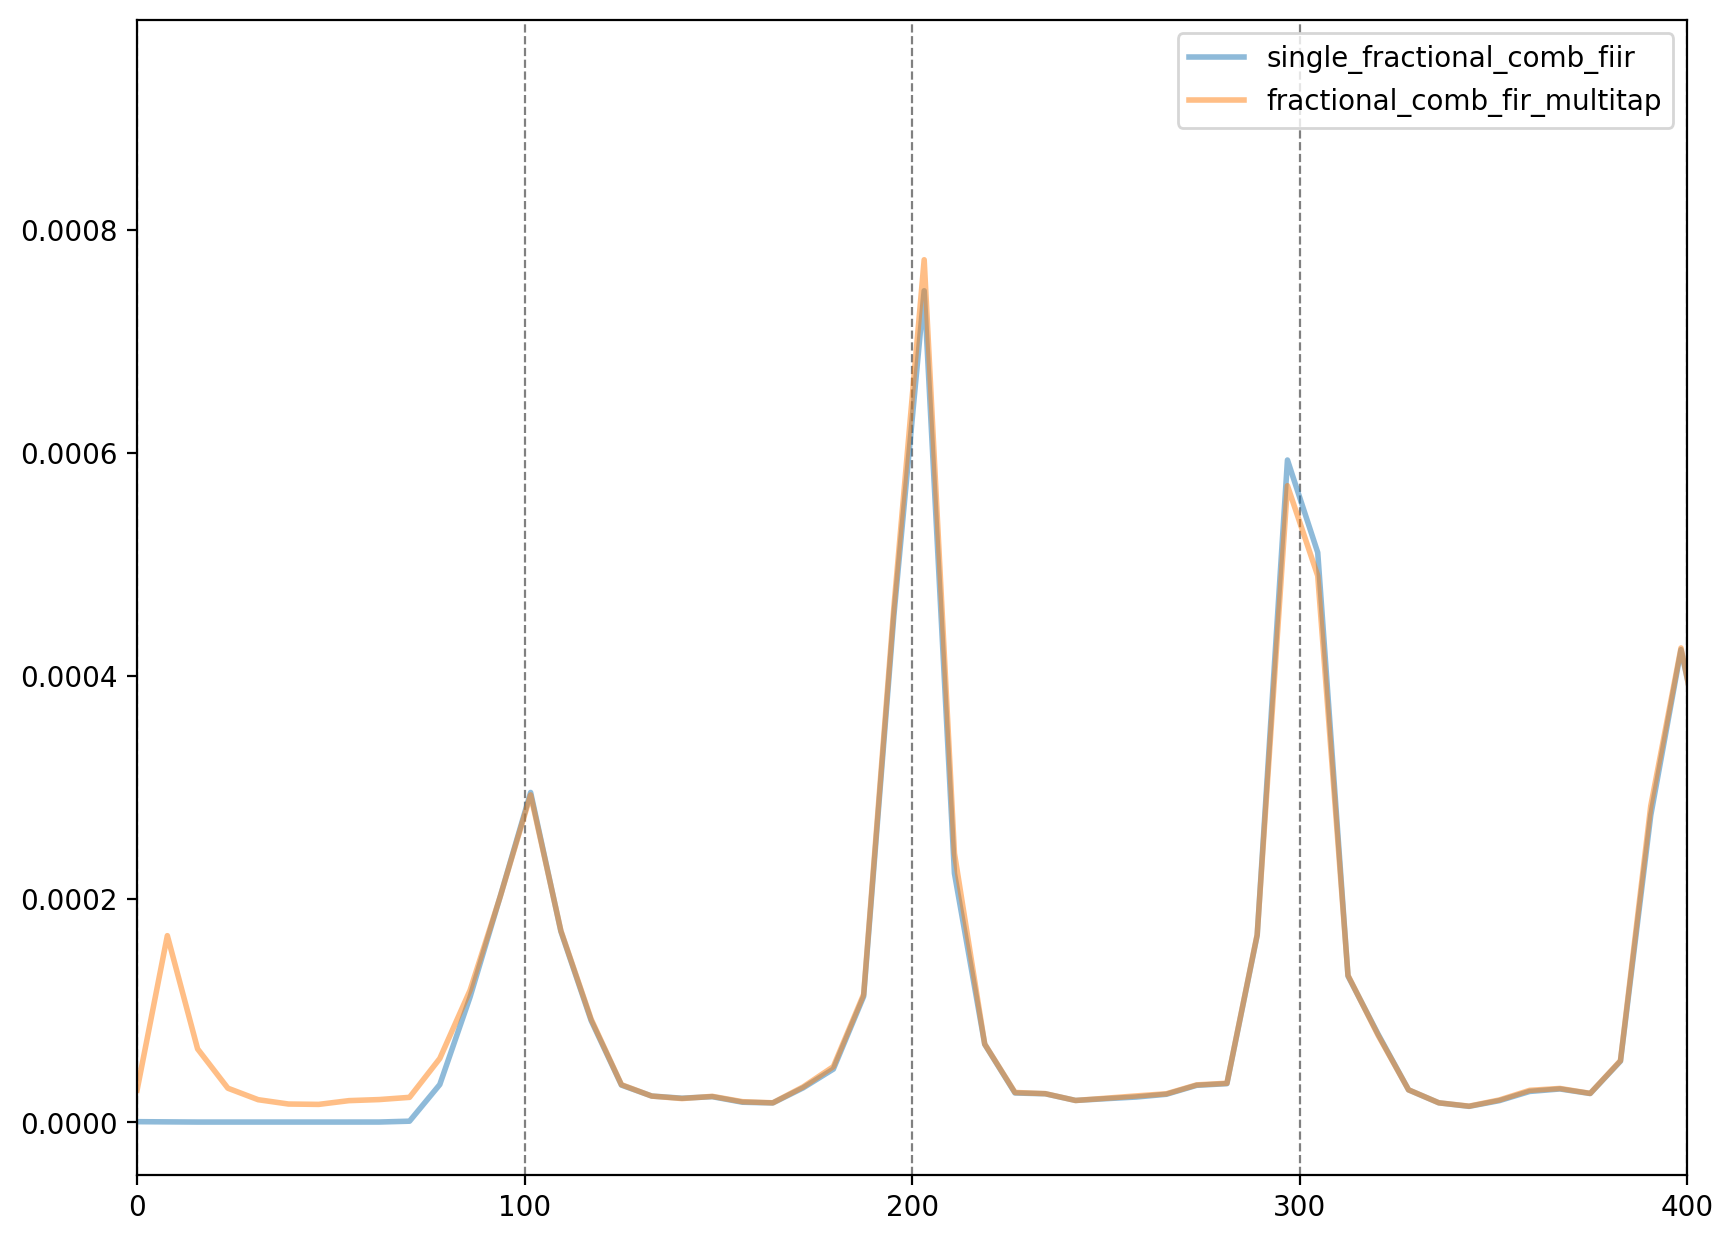

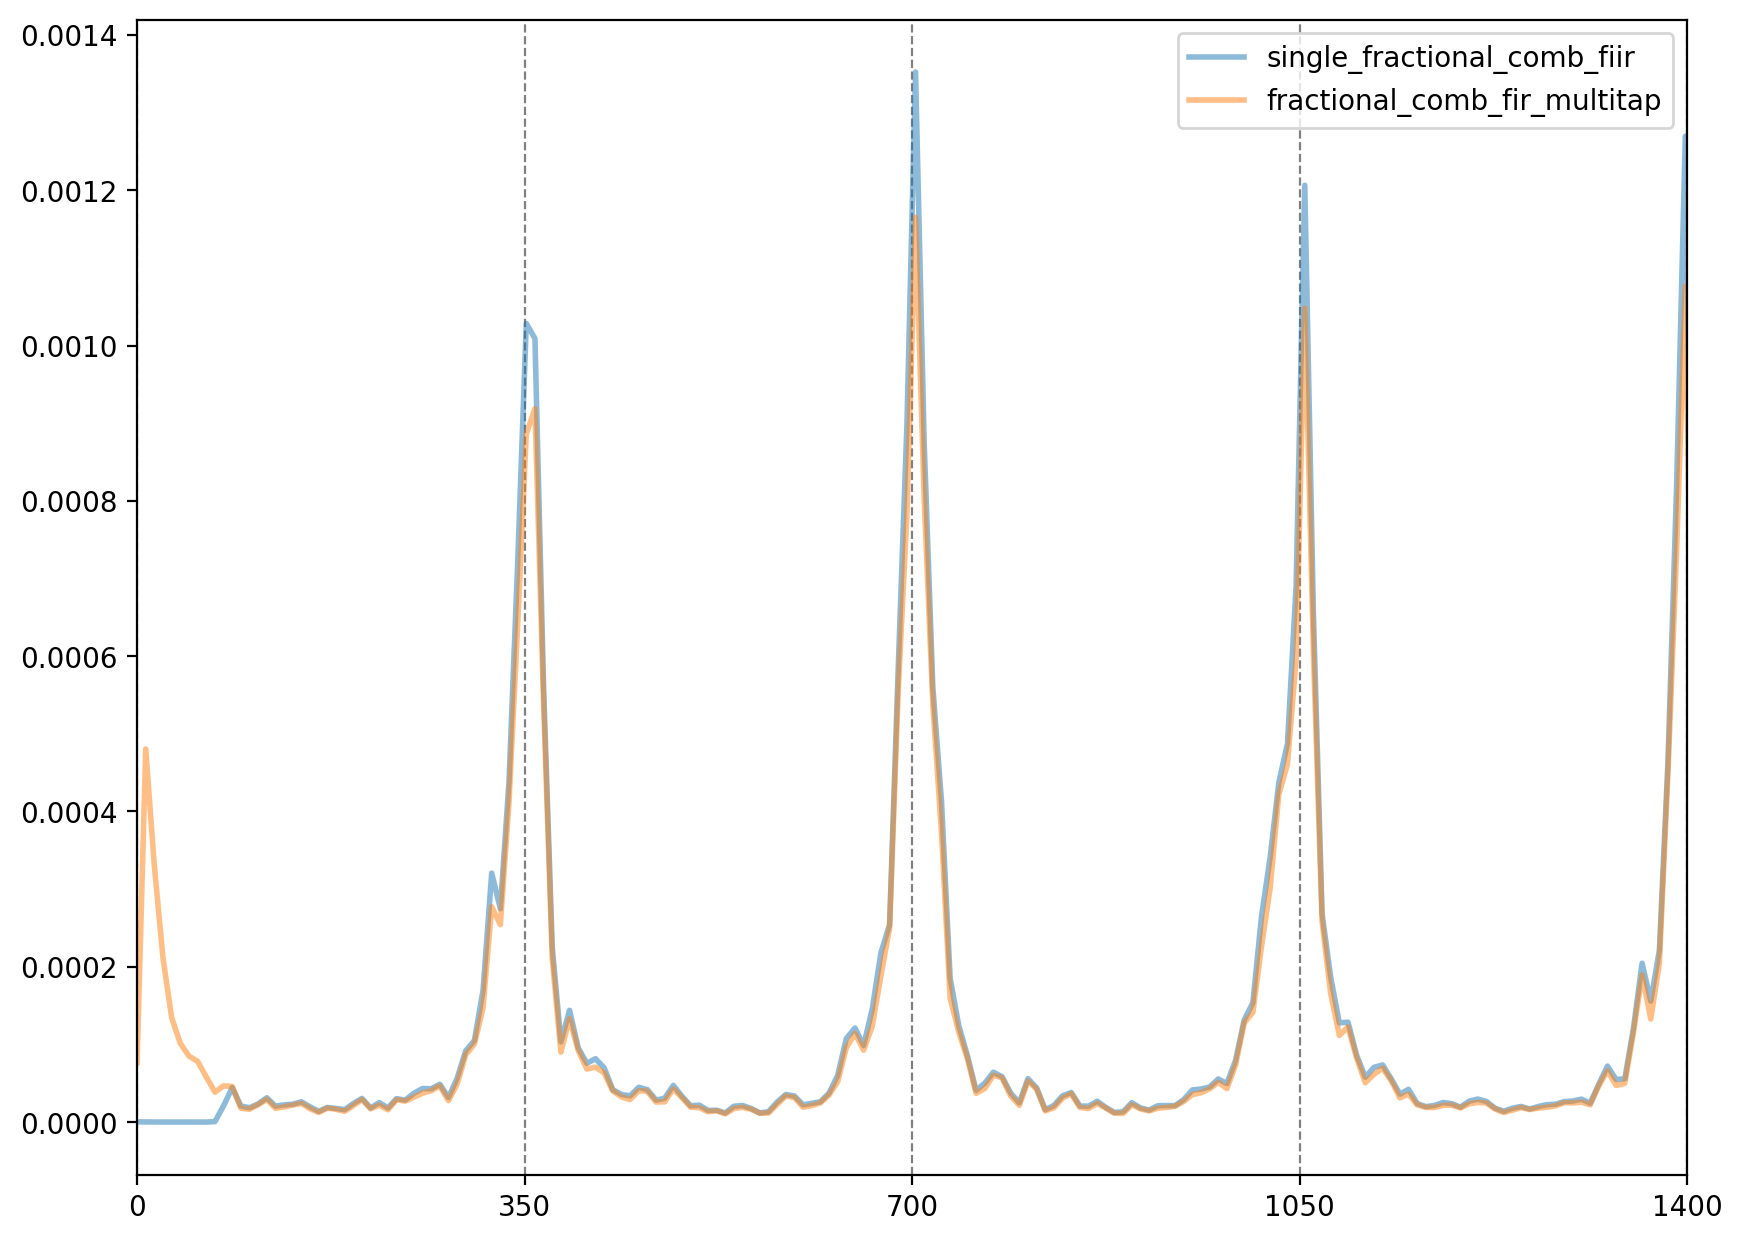

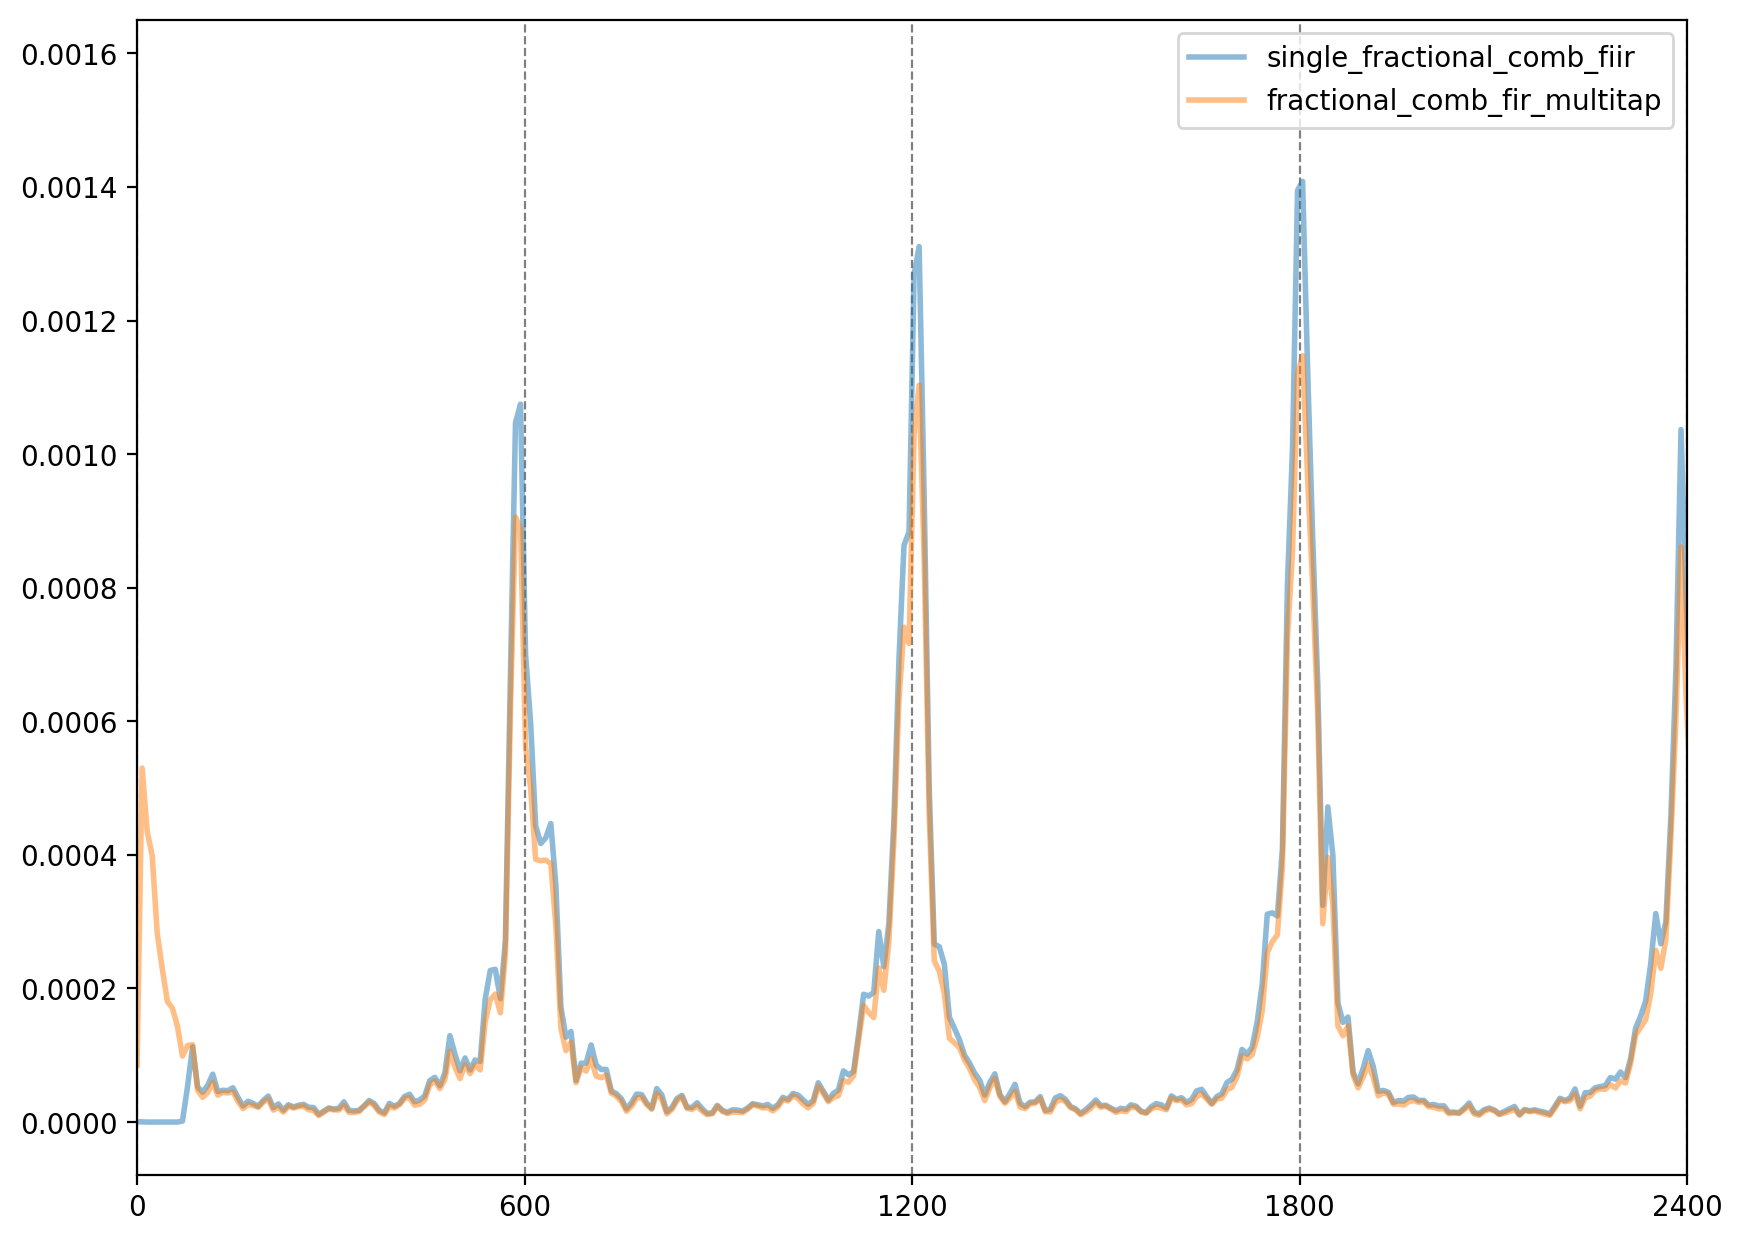

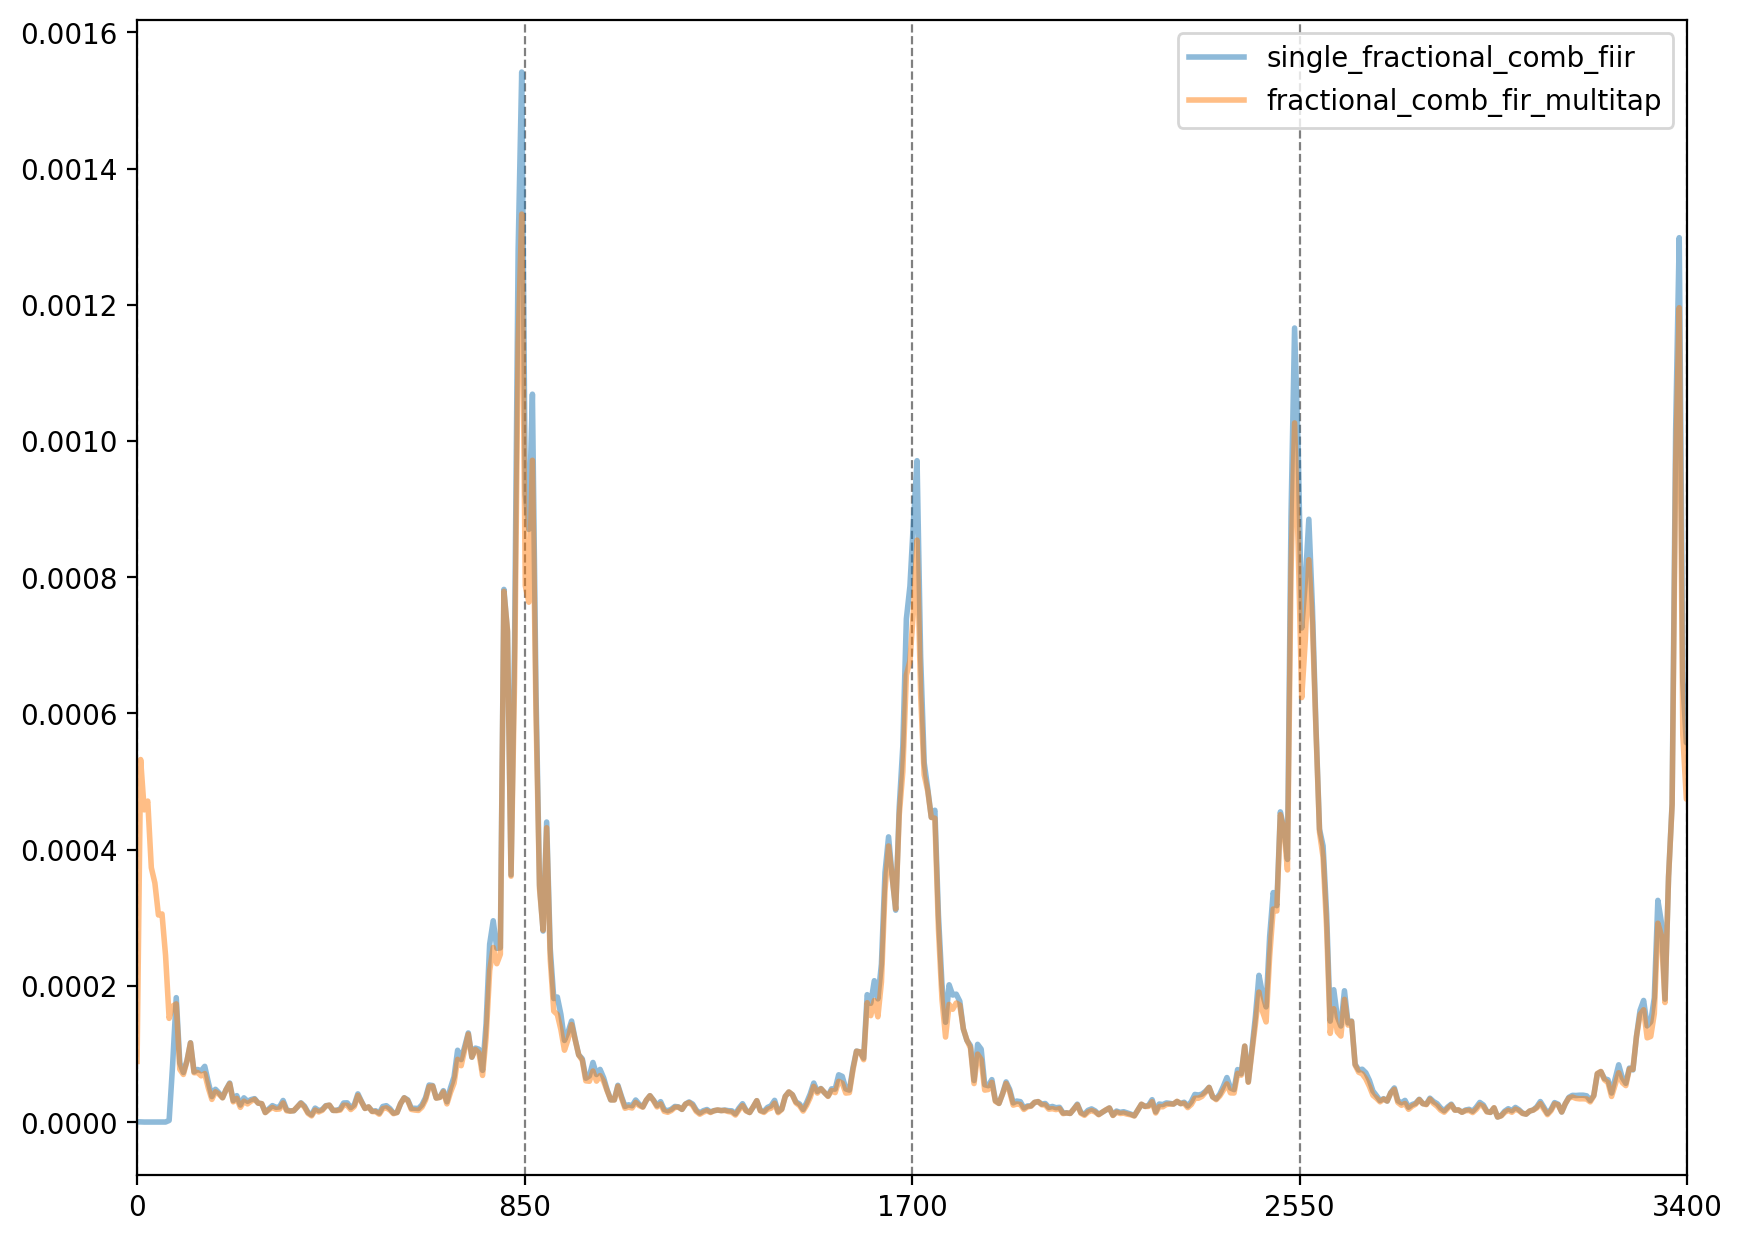

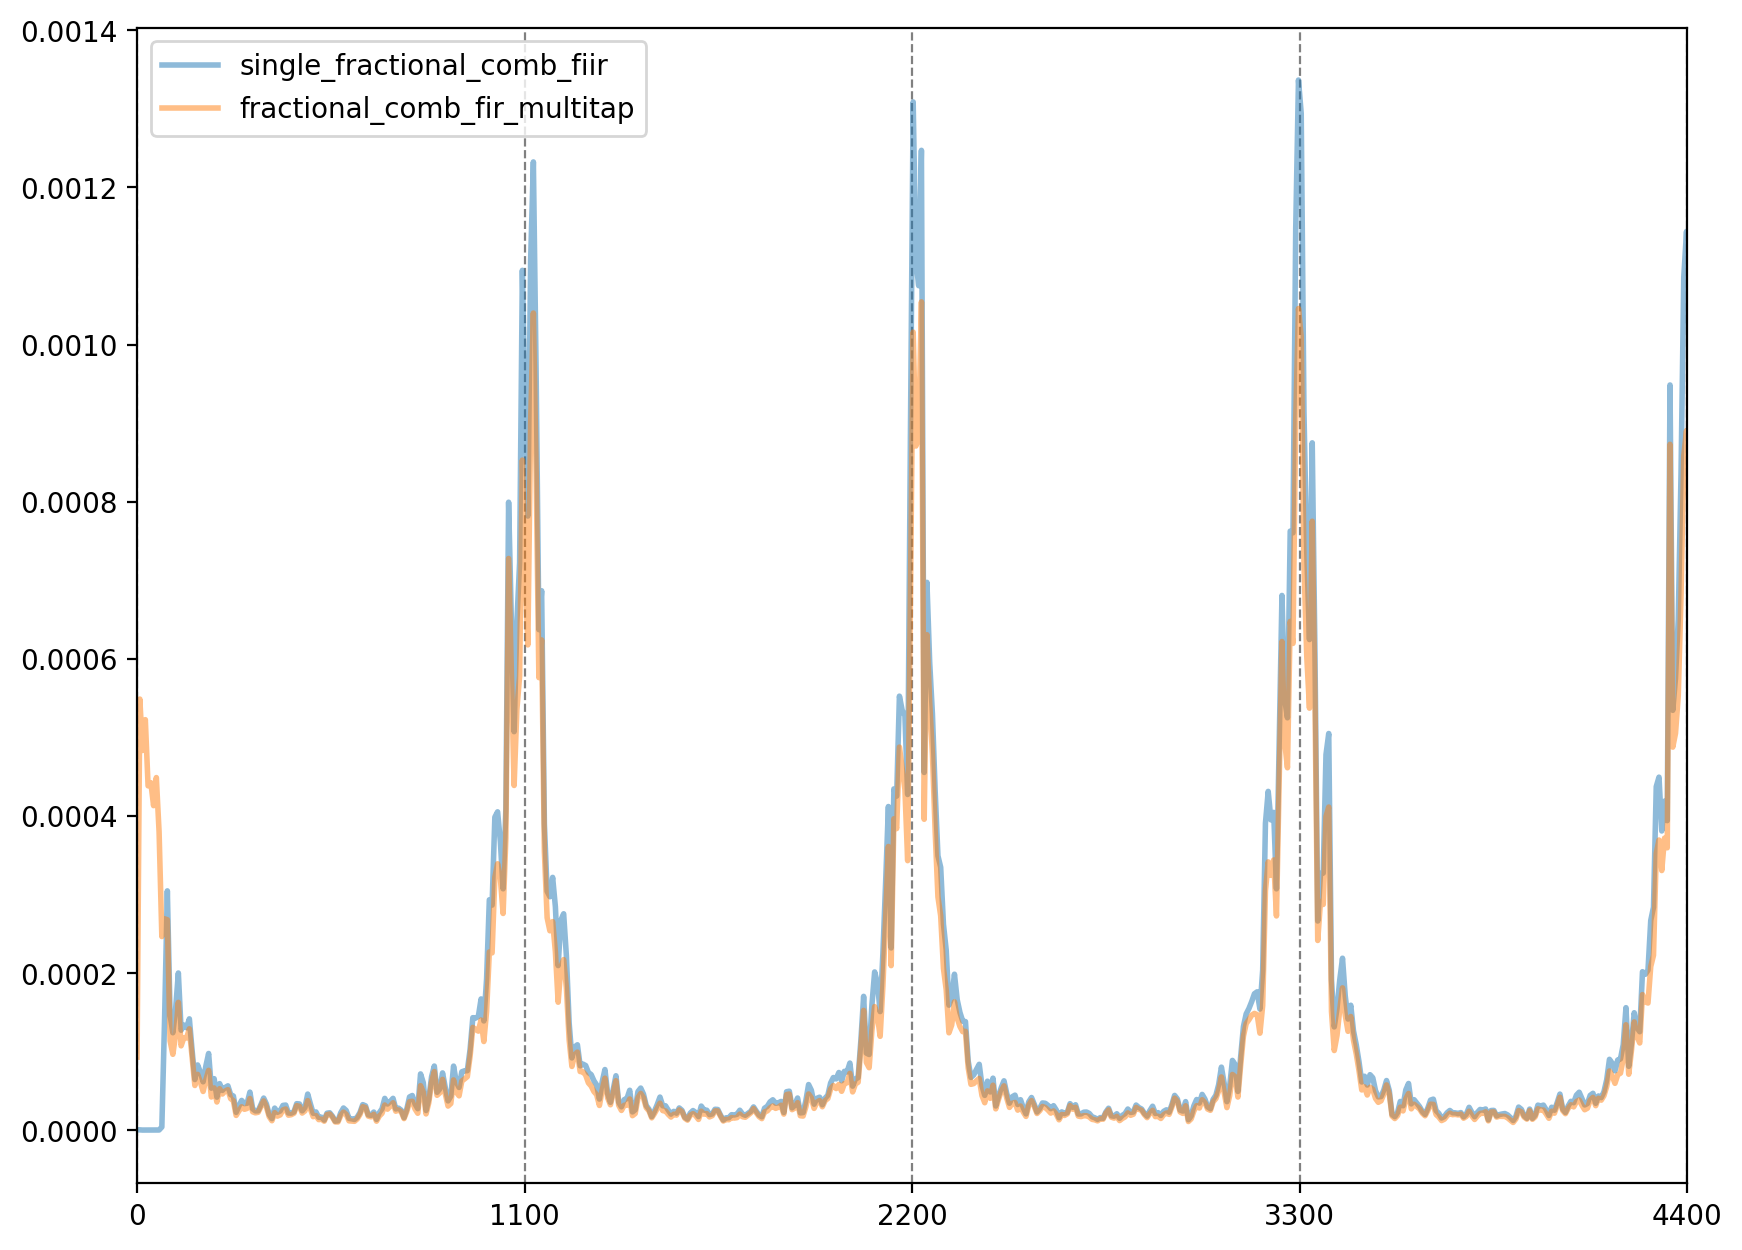

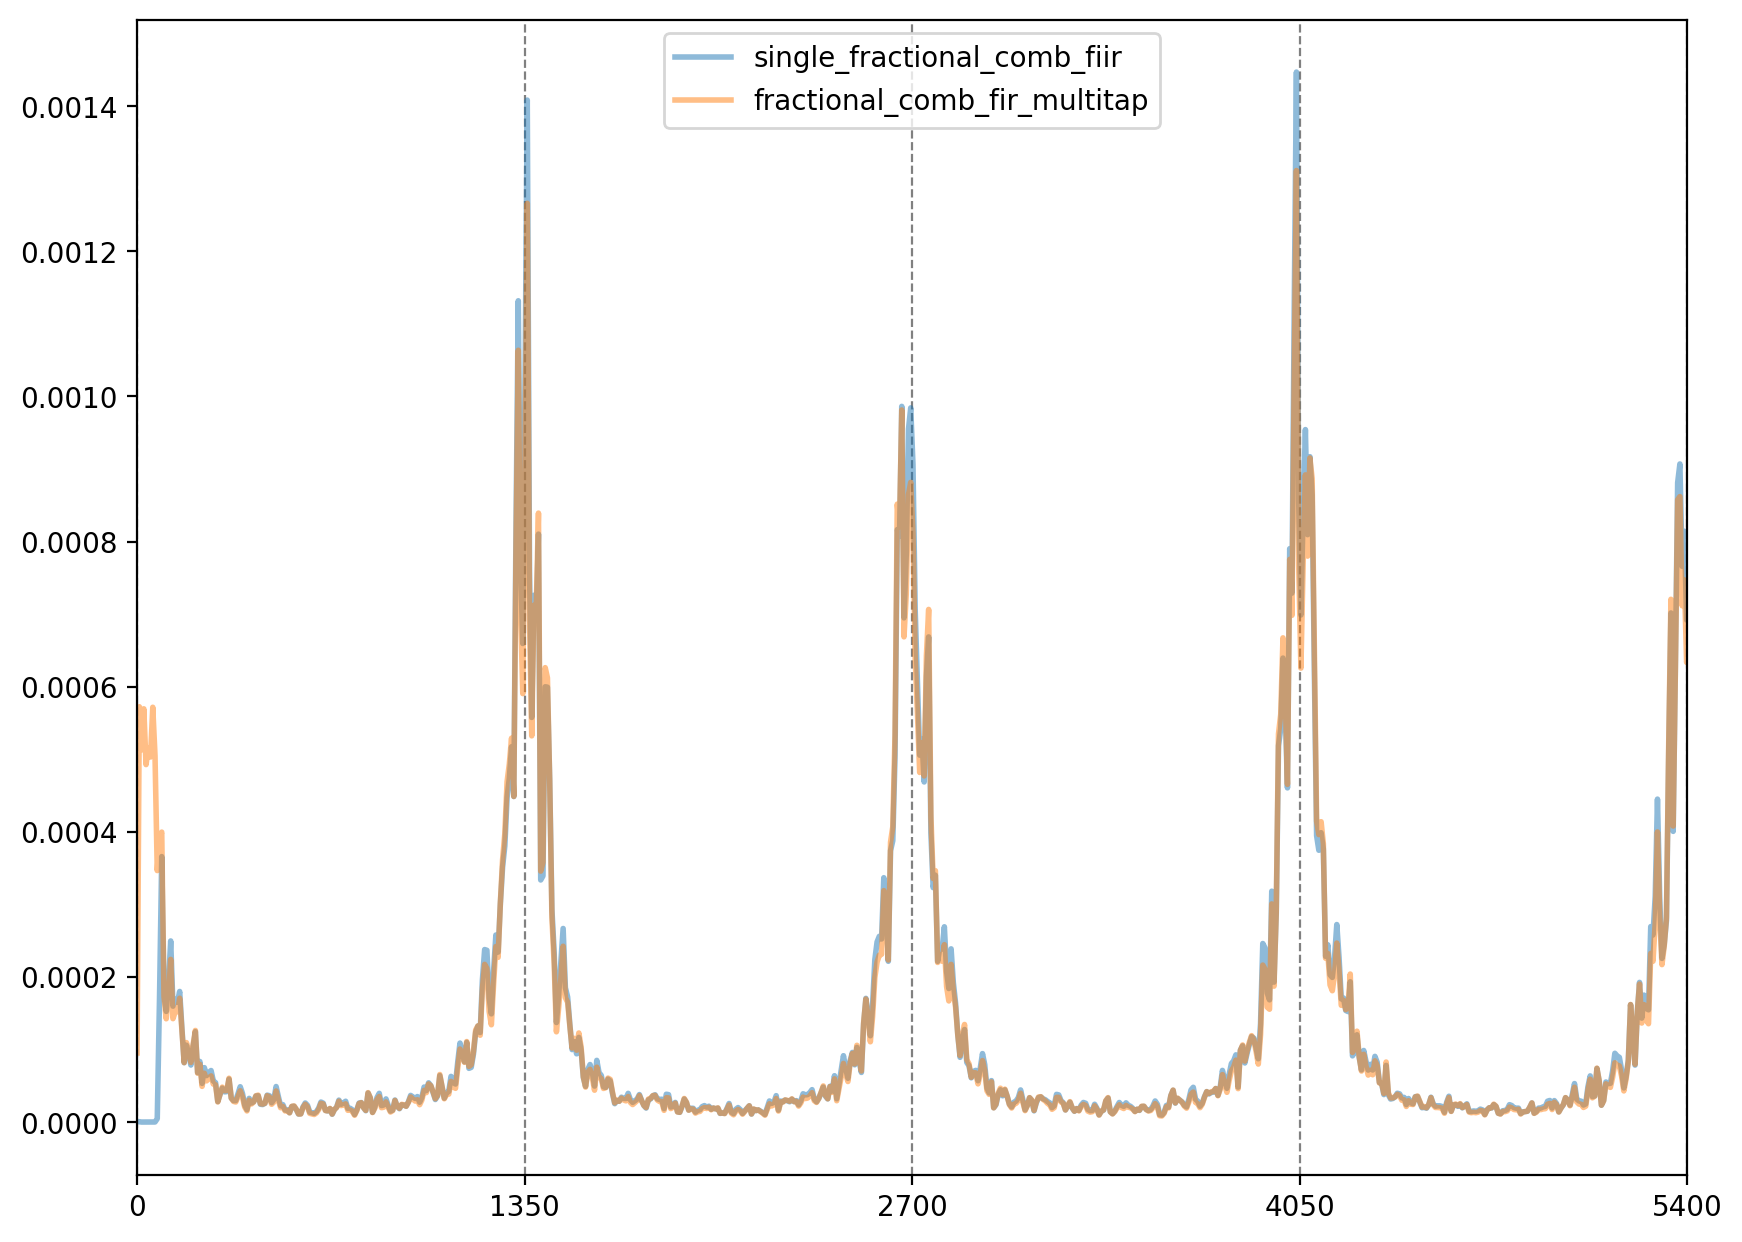

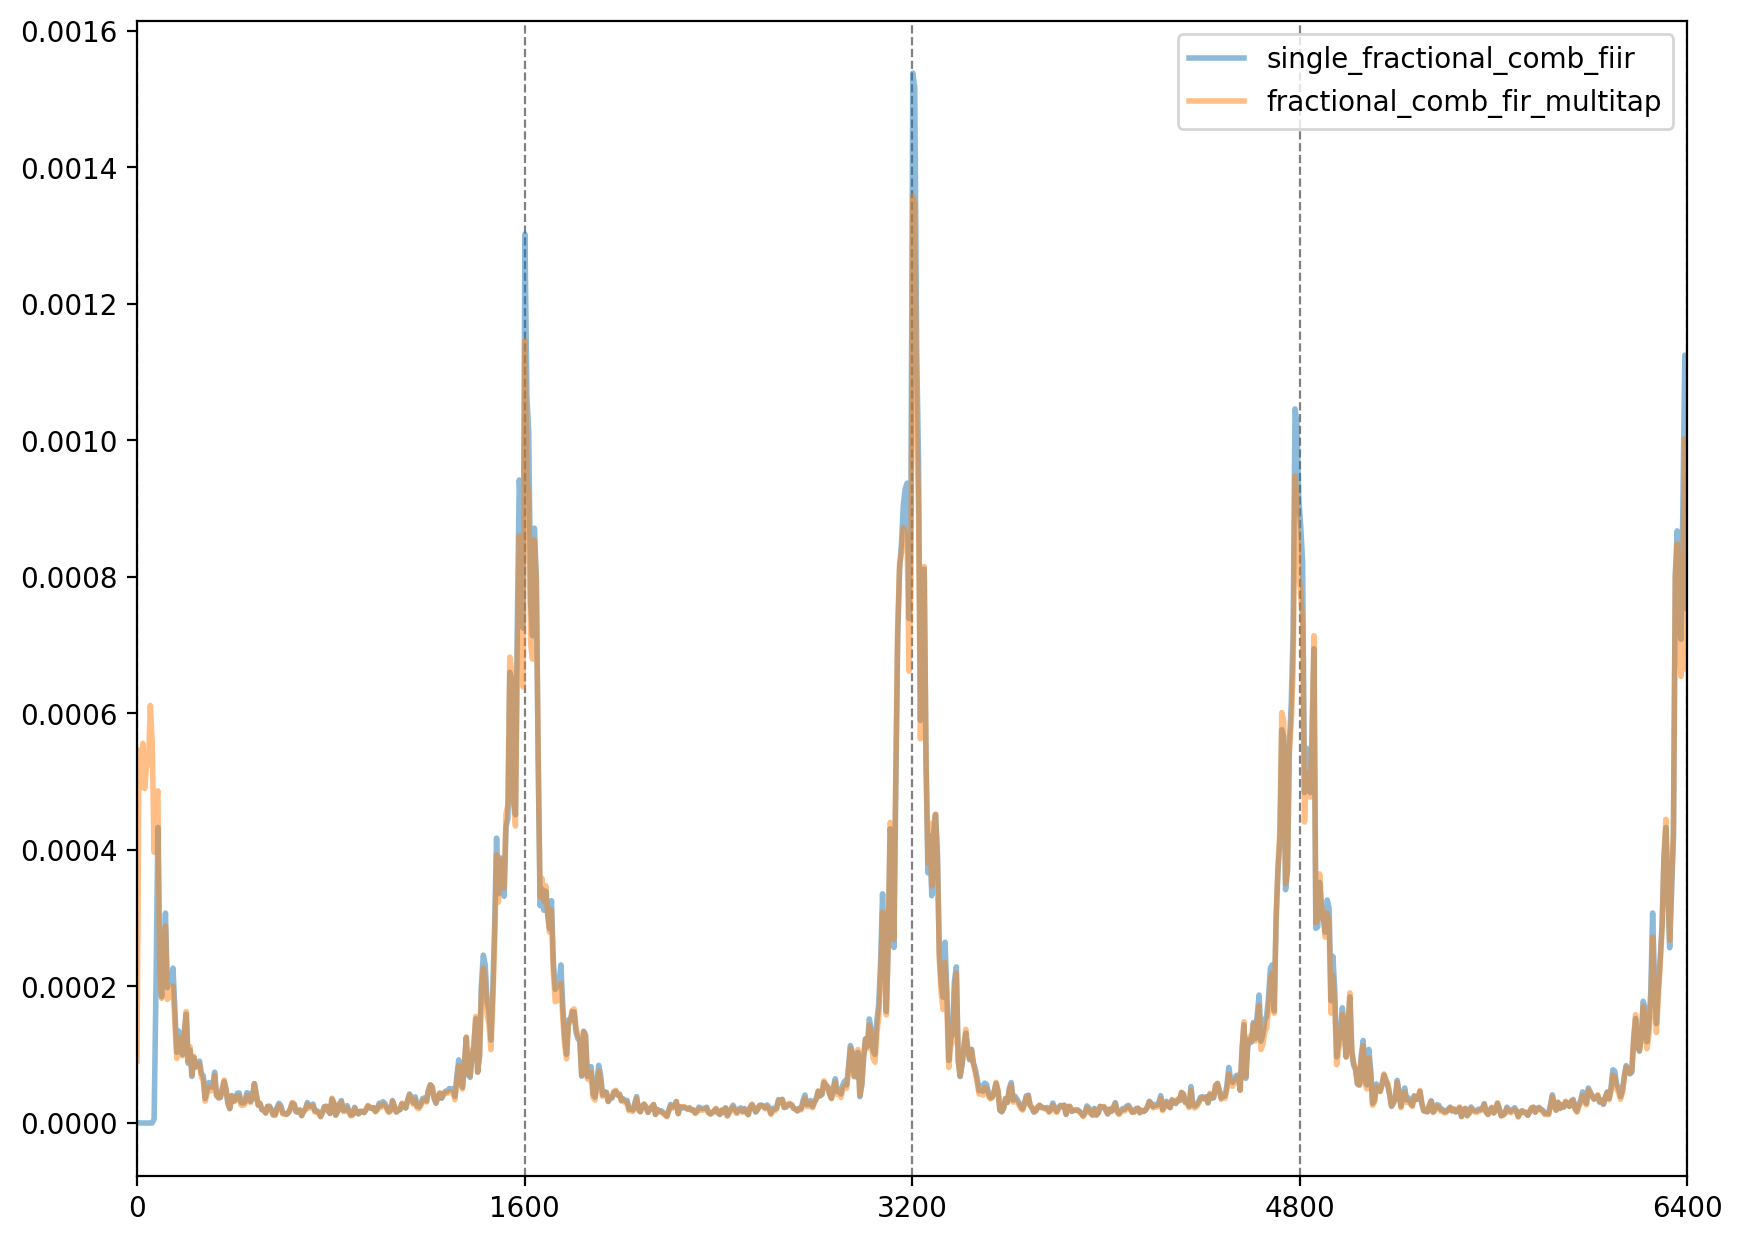

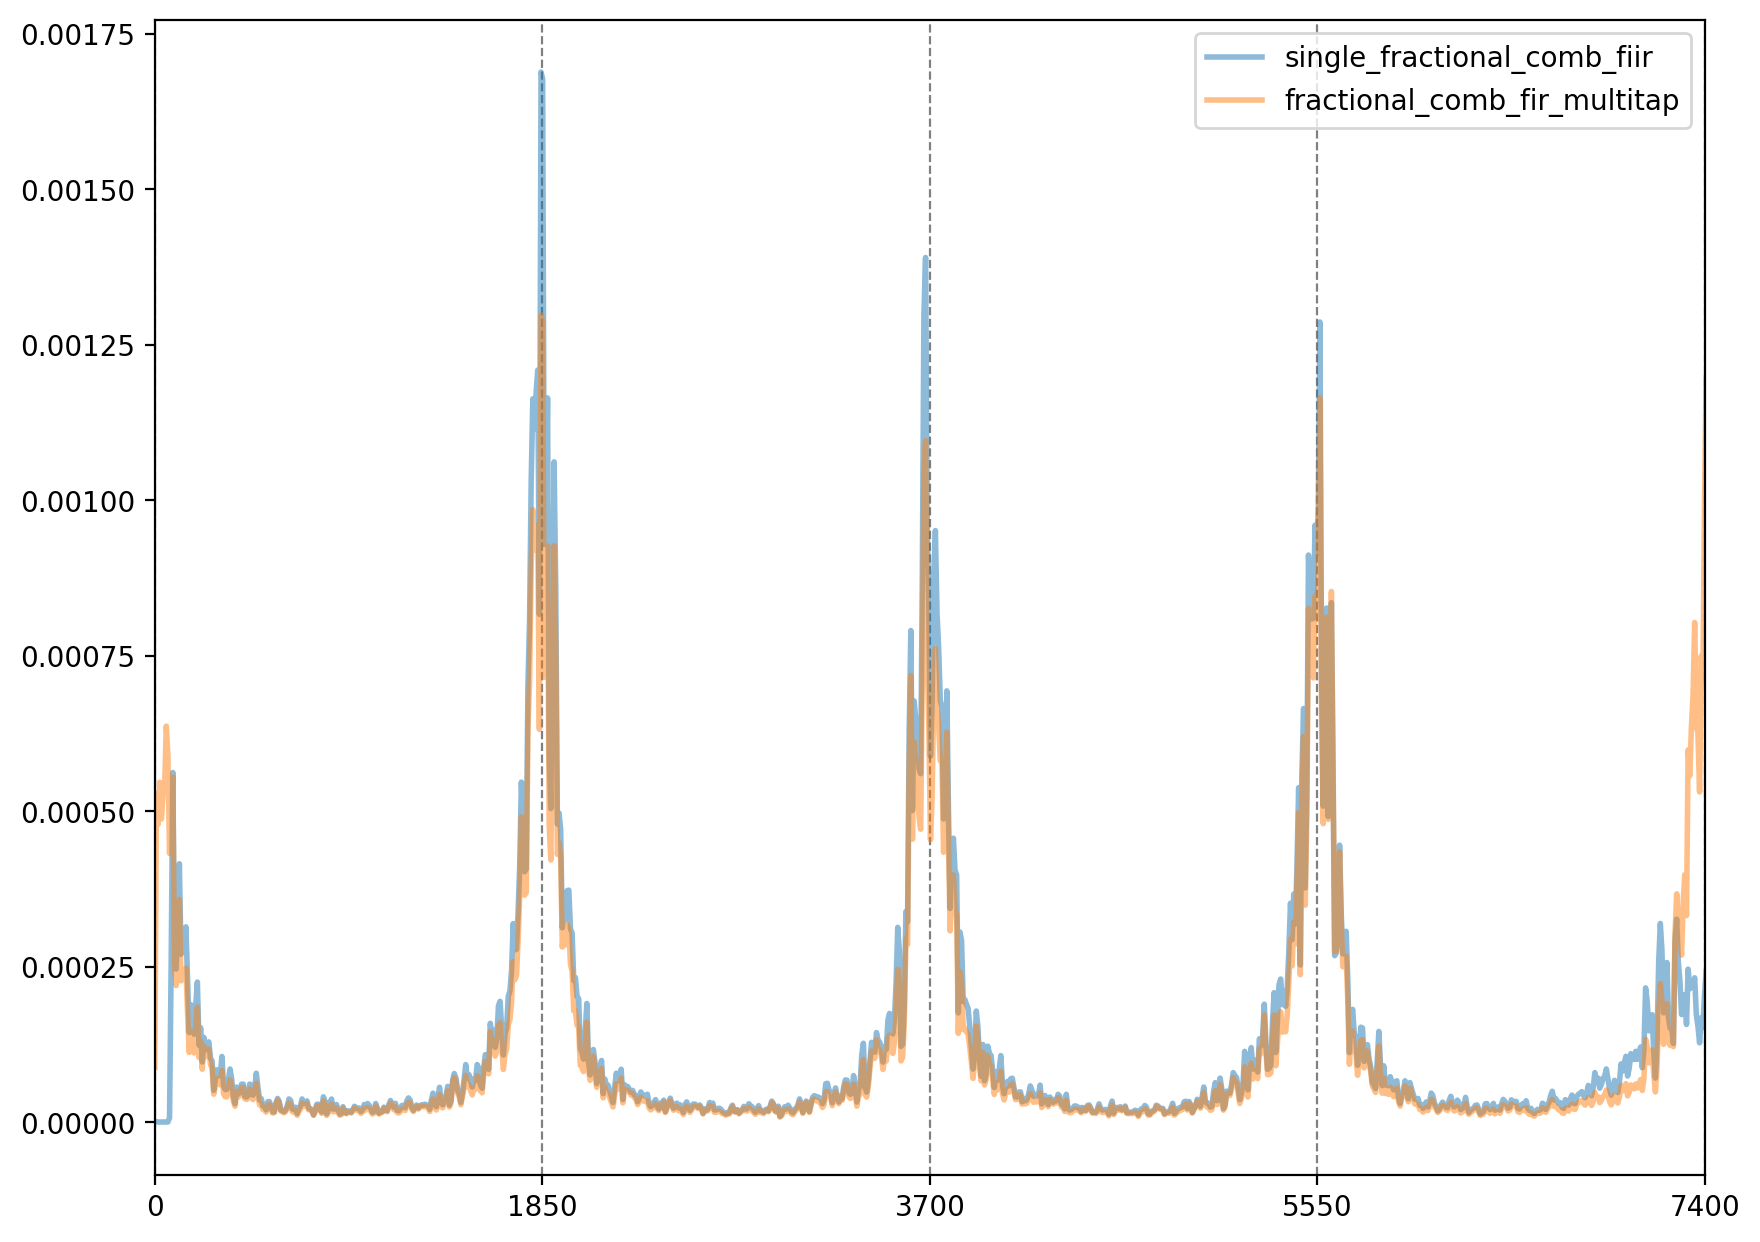

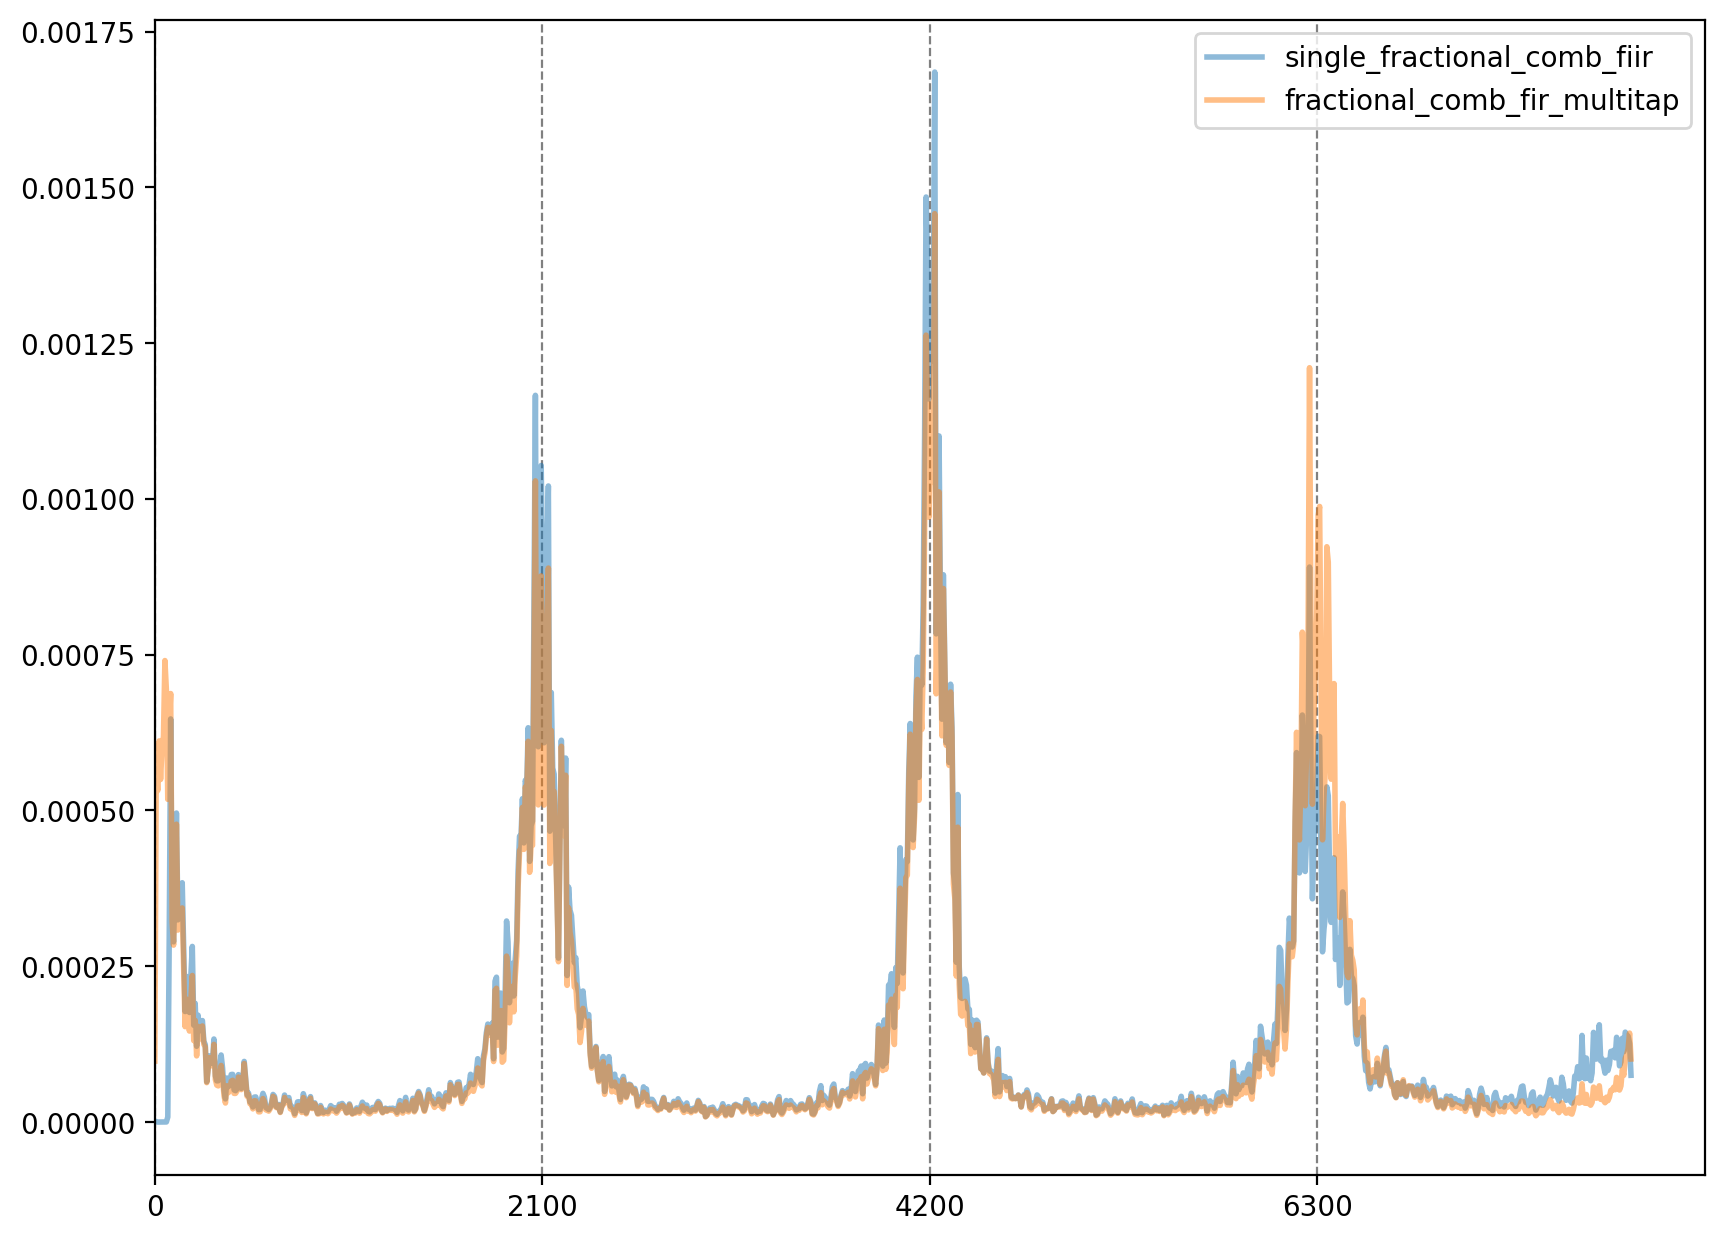

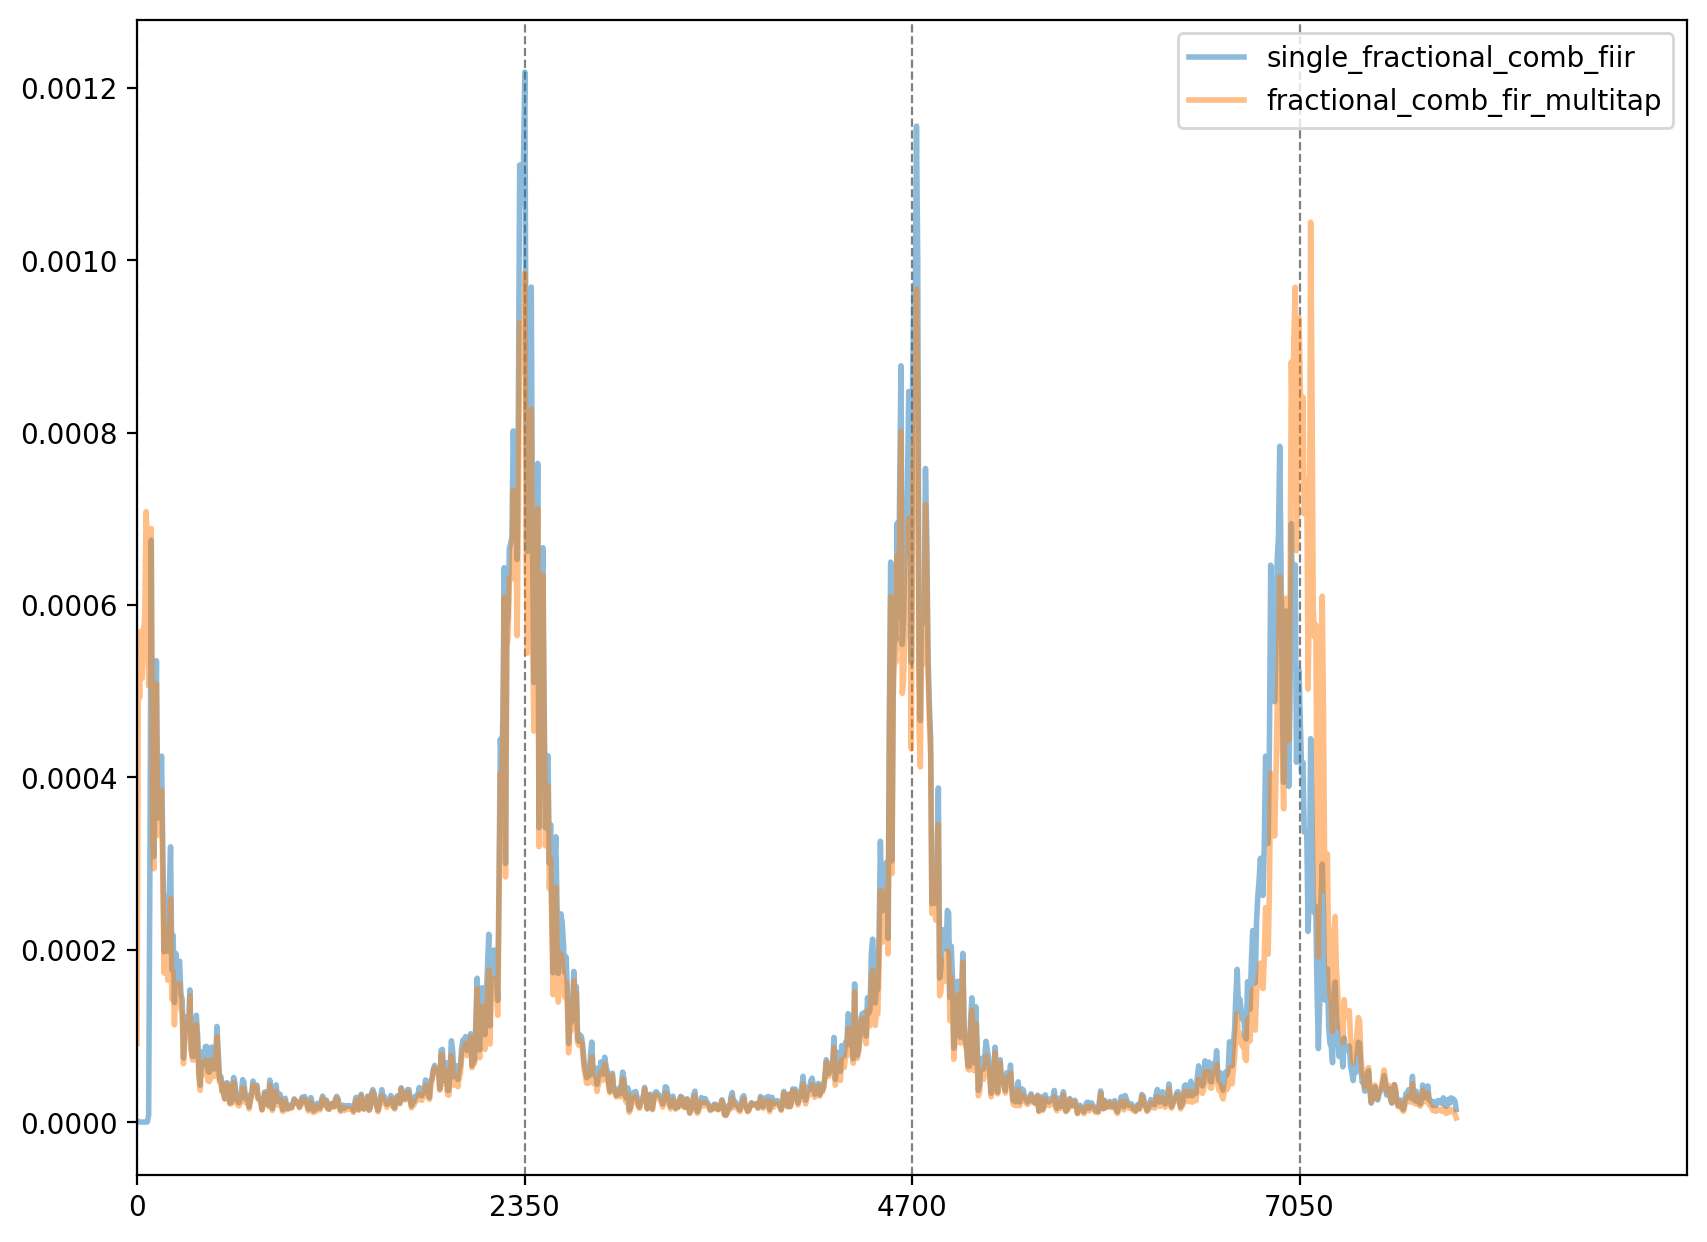

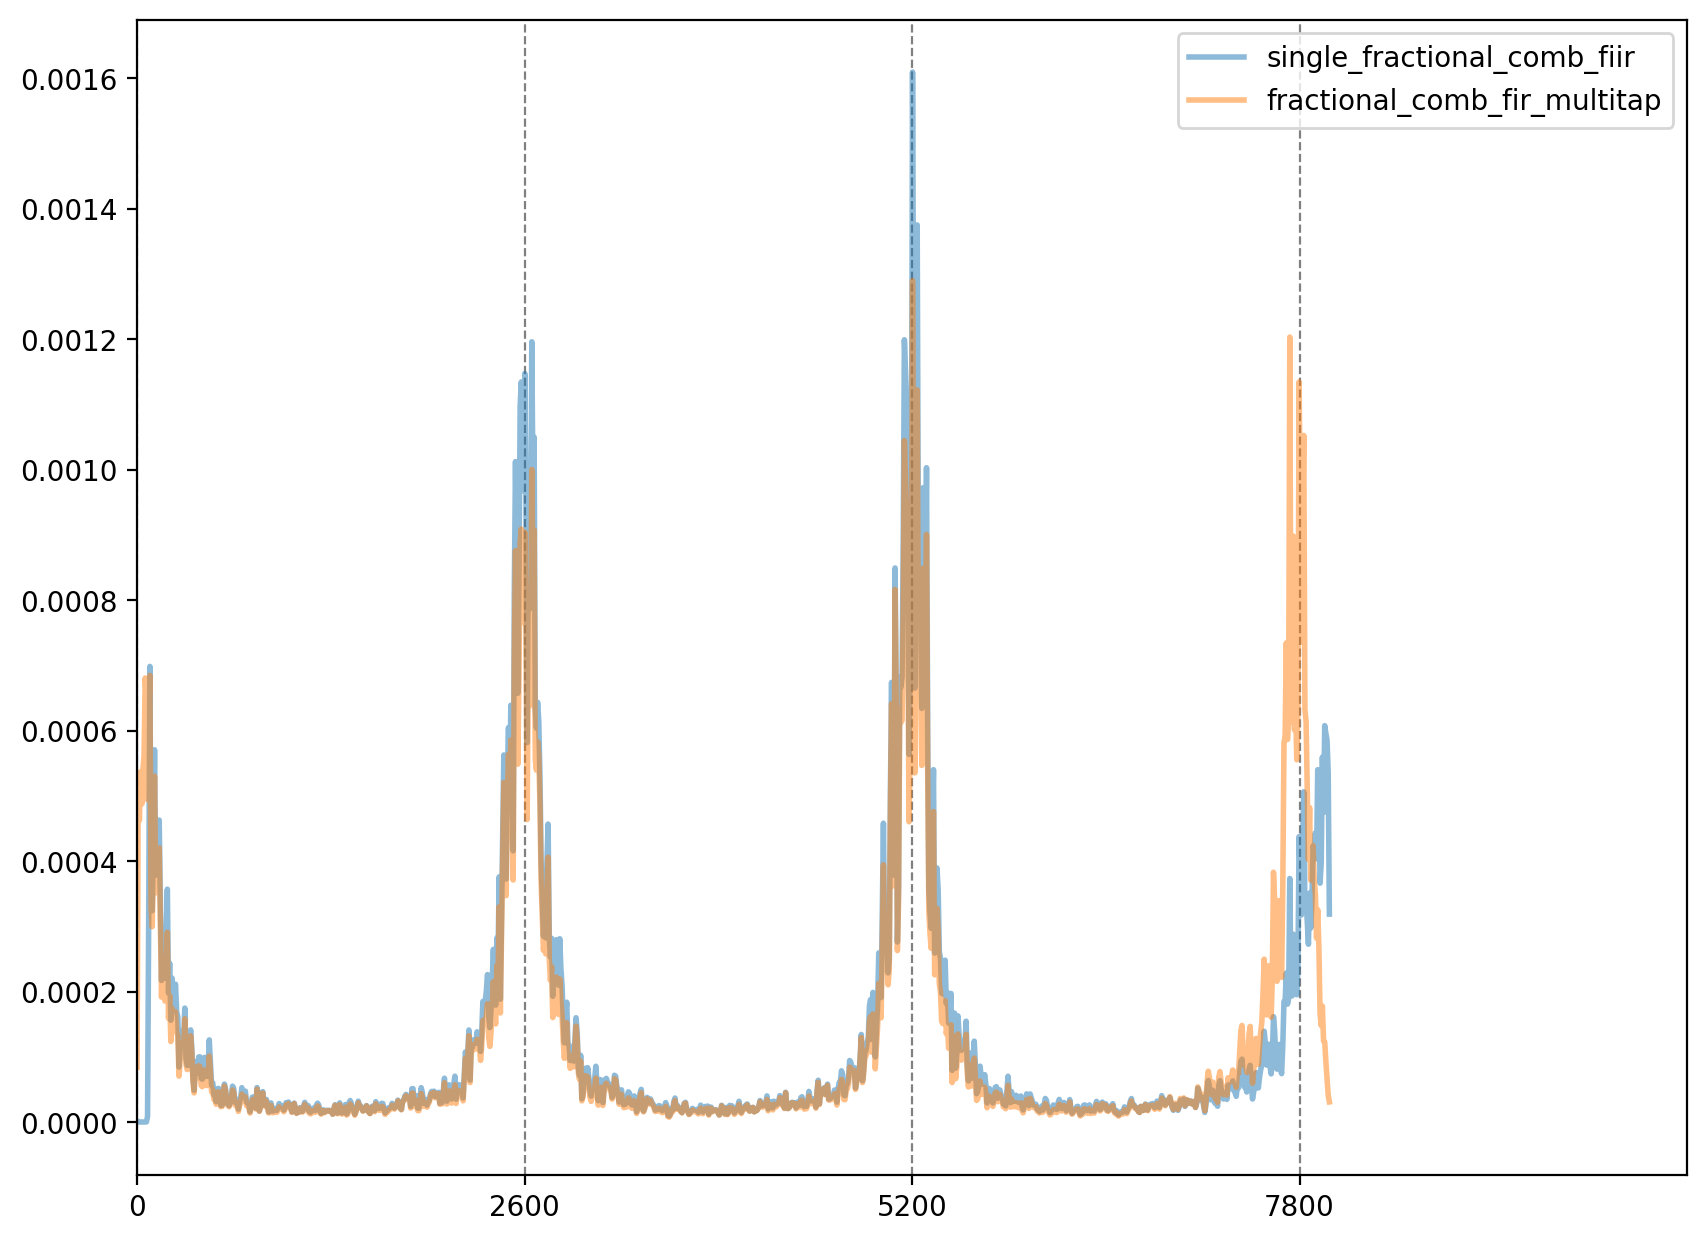

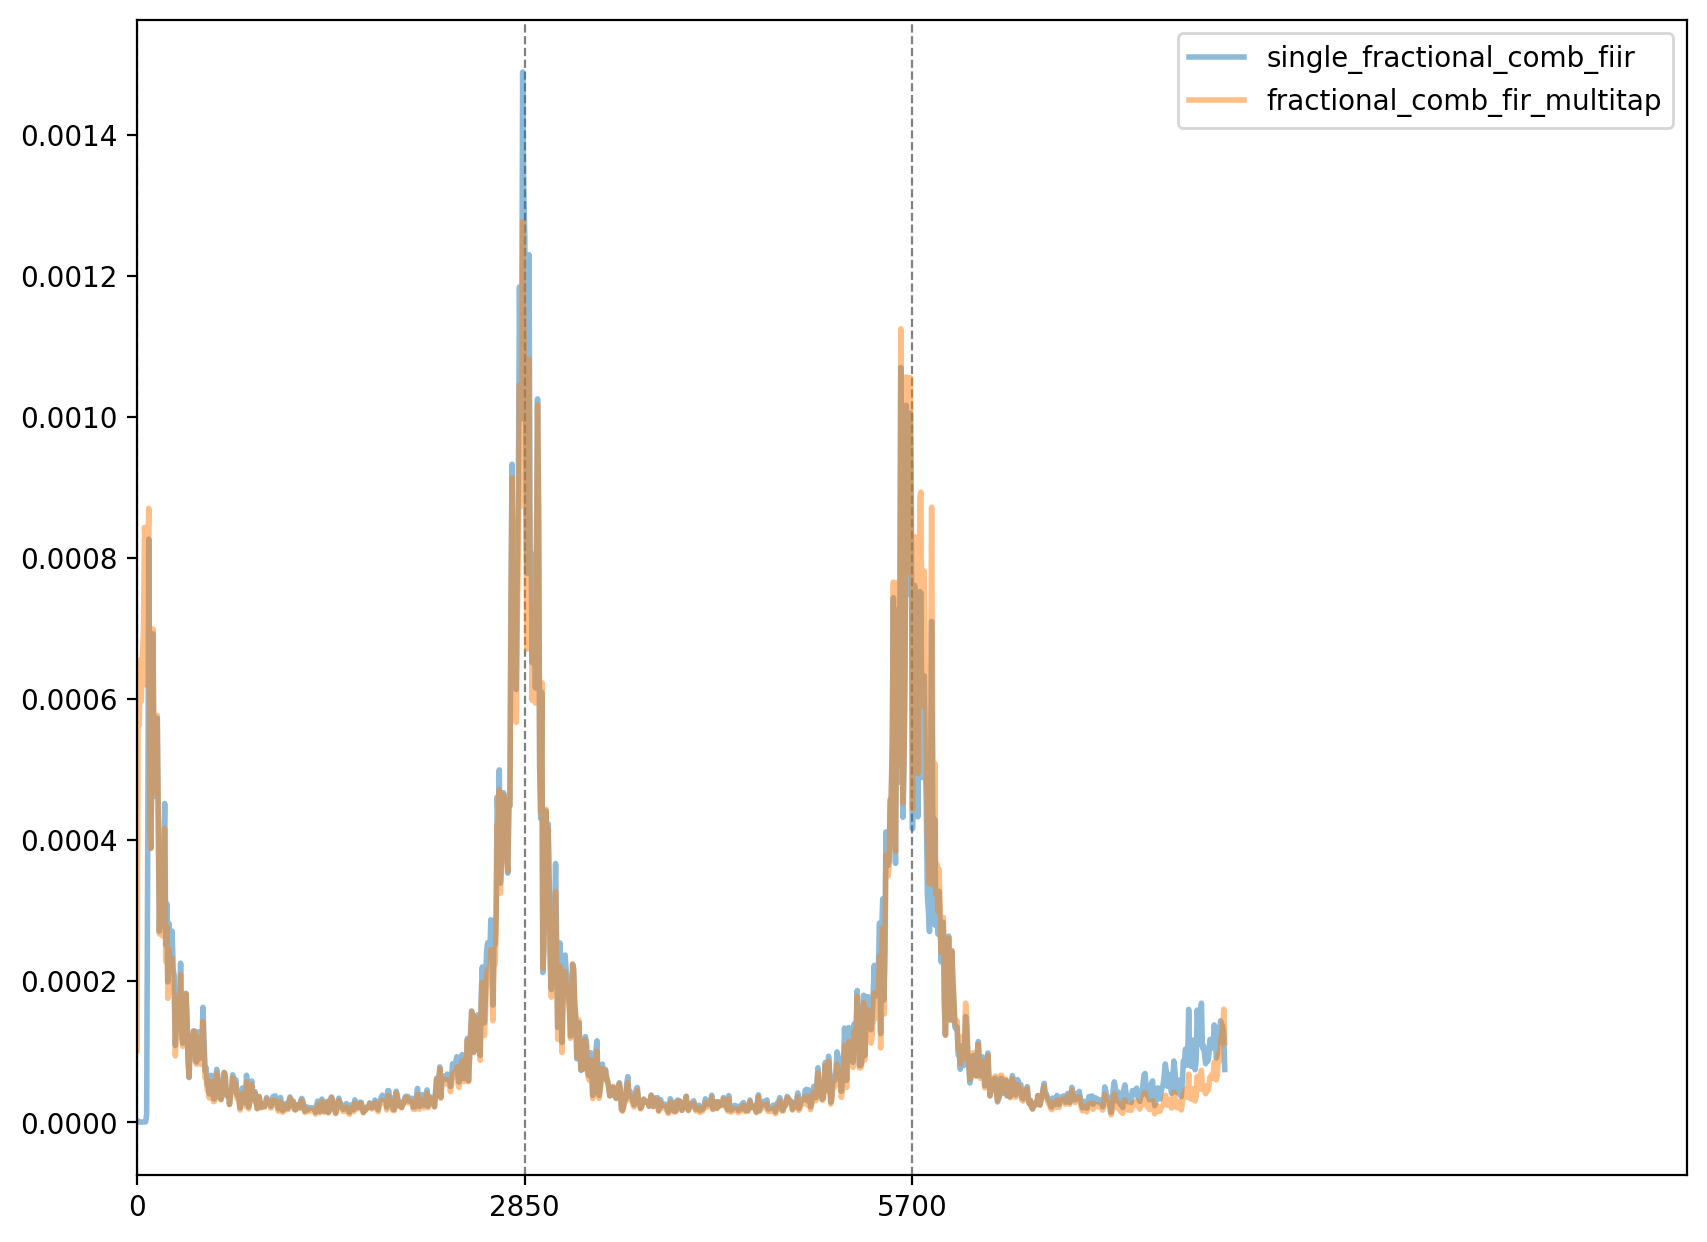

In [290]:
# Input to apply this on
sr = 16000
x = torch.randn(sr).unsqueeze(0)
# x = zeros( sr); x[0] = 1

# Try them all out
f0,a = 151.1, .75
f0,a = 551.1, .75

candidates = [
    # combnet.filters.single_comb_iir_faithful,
    # combnet.filters.single_comb_fir_multitap,
    combnet.filters.single_fractional_comb_fiir,
    # combnet.filters.single_fractional_comb_modulo,
    # combnet.filters.single_fractional_comb_diric
    # combnet.filters.single_fractional_comb_fir_multitap
    combnet.filters.fractional_comb_fir_multitap
]

for f0 in range(100, 3000, 250):
    for comb_fn in candidates:
        y = comb_fn( x, f0, a, sr).squeeze()
        gca().plot( *welch( y/y.std(), fs=sr, nperseg=1024*2, nfft=2048), label=comb_fn.__name__, alpha=.5, lw=2)

    gcf().set_size_inches(10, 7.5)
    gca().set_xticks(torch.arange( 0, sr//2, f0))
    gca().xaxis.grid(True, linestyle='--', color='gray')
    # gca().set_yscale('log')
    gca().legend()
    gca().set_xlim(0, int(4*f0))
    plt.show()

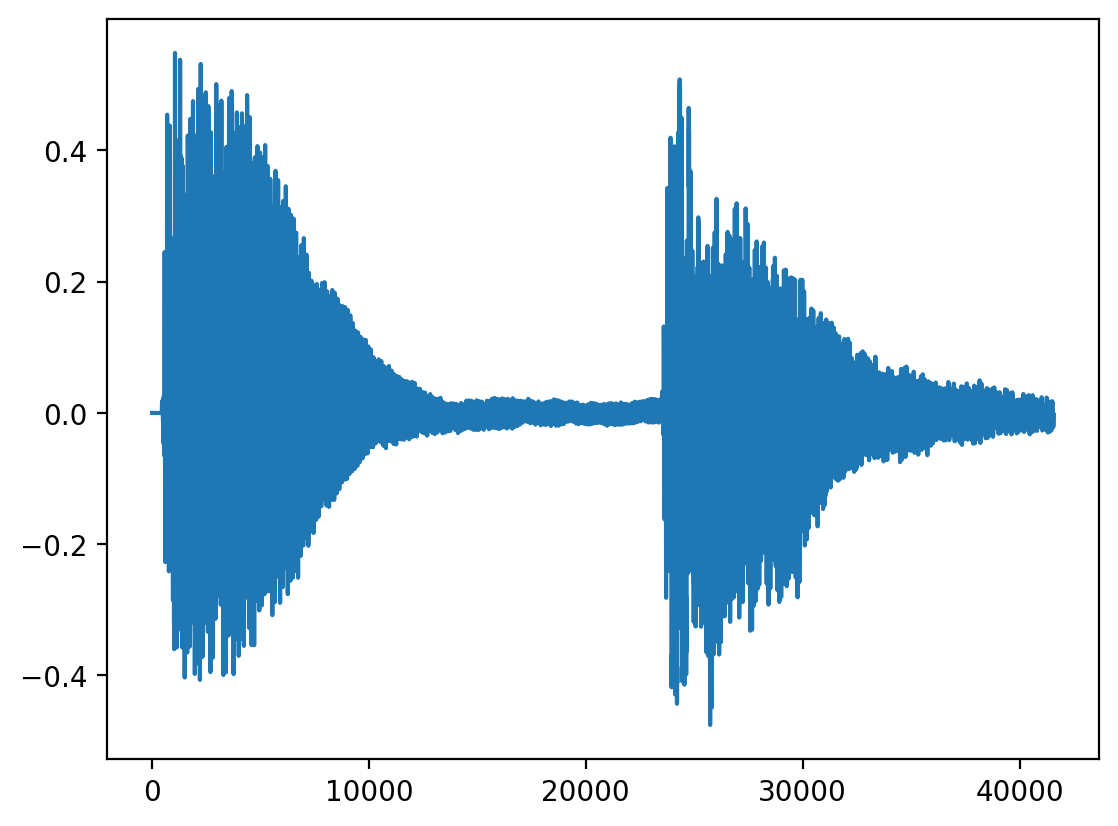

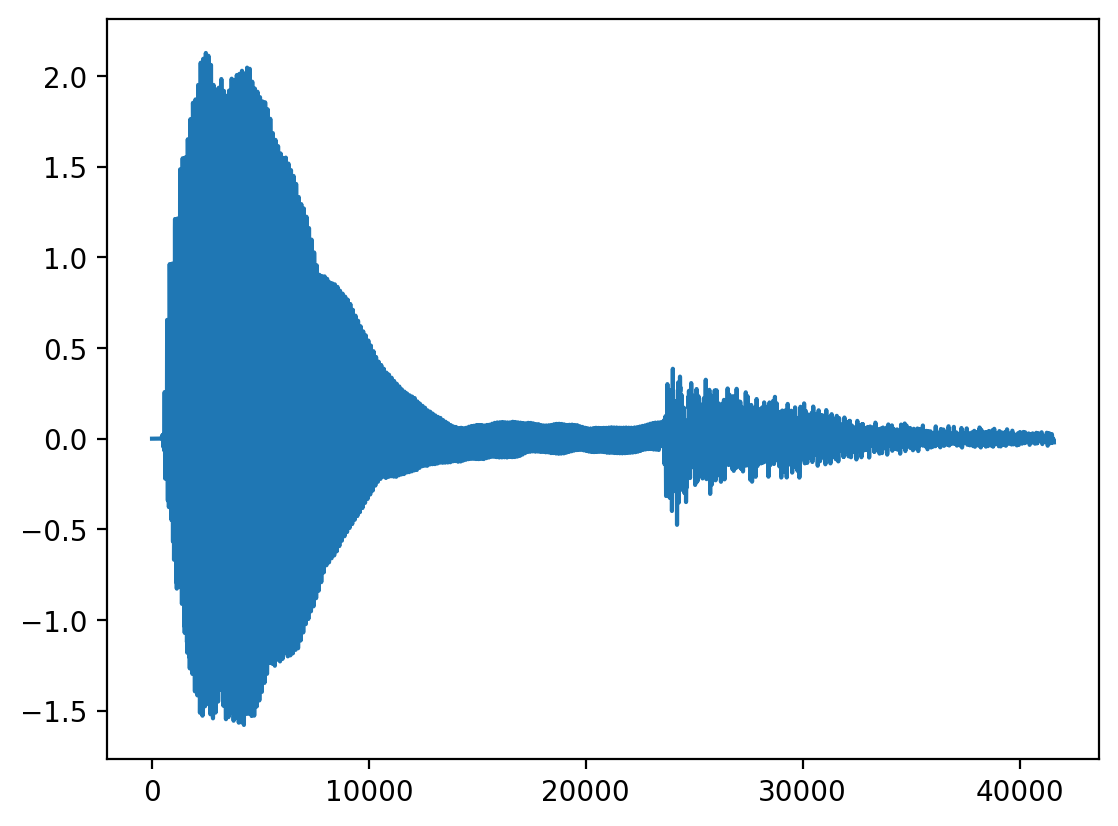

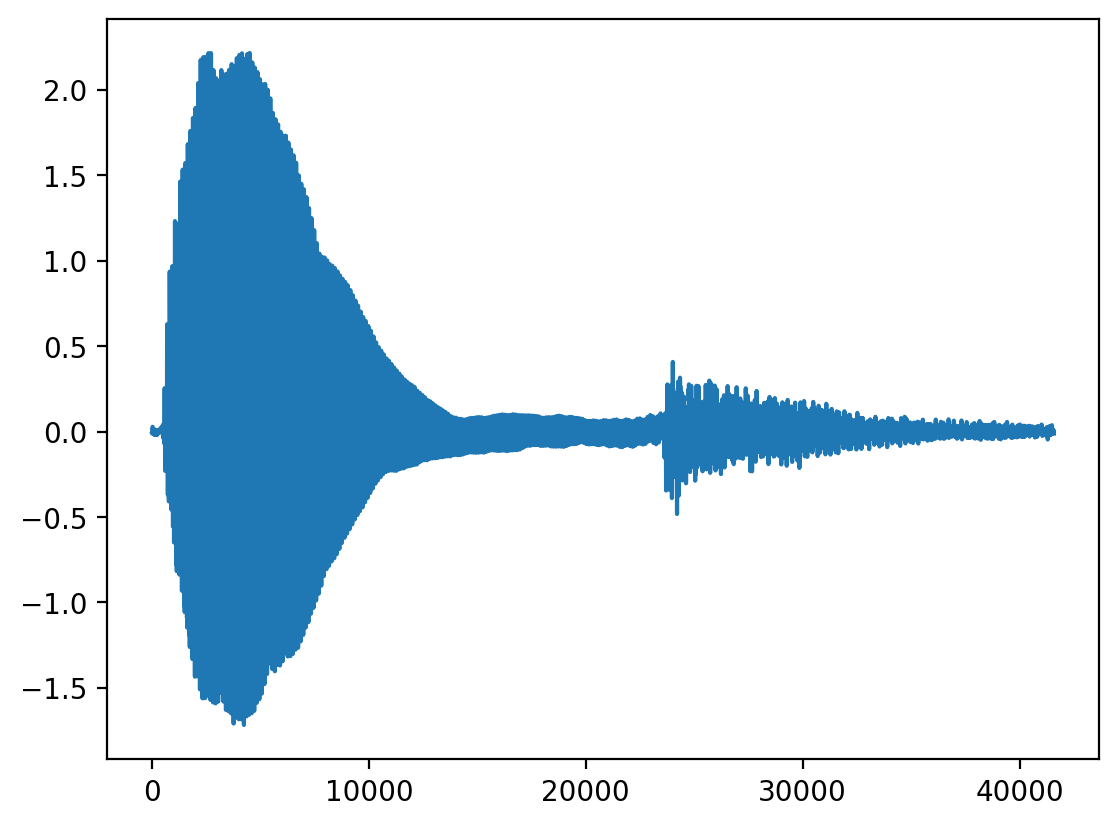

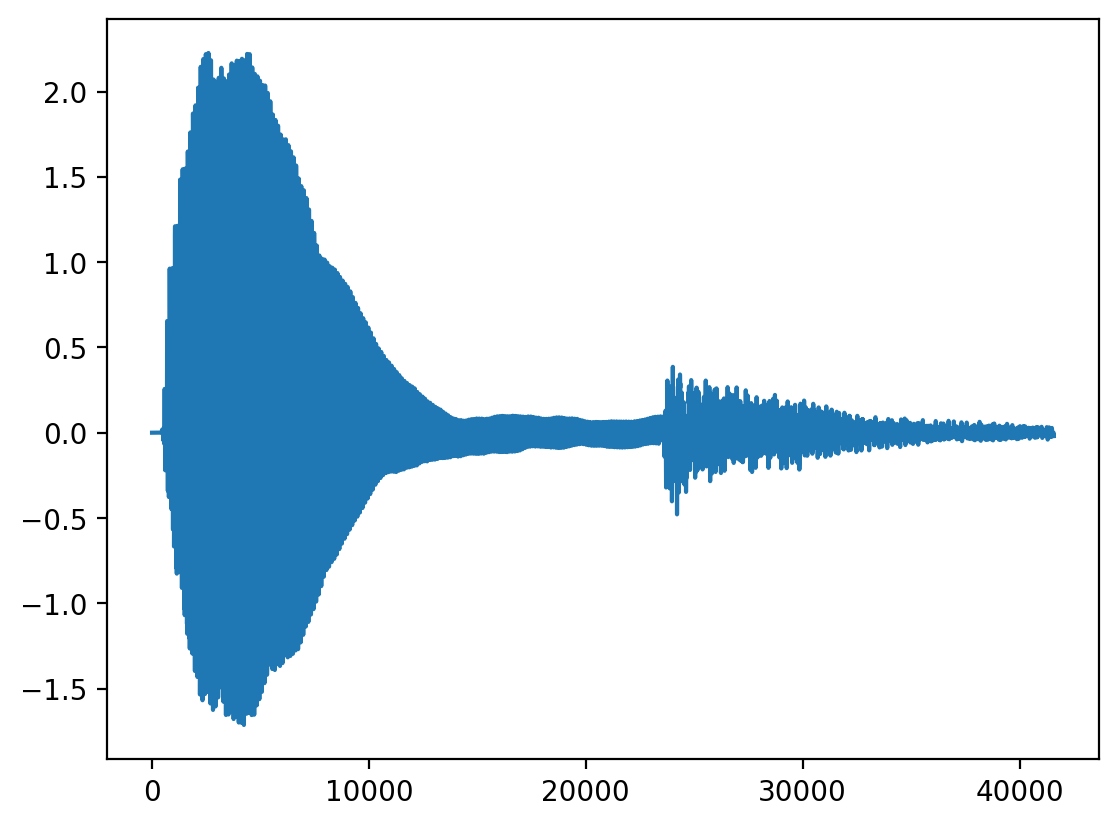

""


""


""


""


In [299]:
x, sr = torchaudio.load('tri.wav')
f0 = 371.
a = 0.8

z = combnet.filters.fractional_comb_fir_multitap(x, f0, a, sr)
w = combnet.filters.single_fractional_comb_fiir(x, f0, a, sr)
y = combnet.filters.single_fractional_comb_iir_faithful(x, f0, a, sr)

plt.plot(x.squeeze()); plt.show()
plt.plot(z.squeeze()); plt.show()
plt.plot(w.squeeze()); plt.show()
plt.plot(y.squeeze()); plt.show()

soundsc(x.squeeze(), sr)
soundsc(z.squeeze(), sr)
soundsc(w.squeeze(), sr)
soundsc(y.squeeze(), sr)

44100


/tmp/ipykernel_2568418/1361680325.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  srf,x = wavread( 'tri.wav')


""


> /home/cameron/combnet/combnet/filters.py(108)fractional_comb_fir_multitap()
    106     #  memory efficient and still not that much faster... The slow part is the conv
    107     import pdb; pdb.set_trace()
--> 108     taps = torch.arange(1, 11, device=x.device, dtype=x.dtype)[..., None, None, None] # n_taps x 1 x 1 x 1
    109     delays = taps * l[None, ..., None] # n_taps x out_channels x in_channels x 1
    110     gains = a[None, ..., None] ** taps # n_taps x out_channels x in_channels x 1



ipdb>  n


> /home/cameron/combnet/combnet/filters.py(109)fractional_comb_fir_multitap()
    107     import pdb; pdb.set_trace()
    108     taps = torch.arange(1, 11, device=x.device, dtype=x.dtype)[..., None, None, None] # n_taps x 1 x 1 x 1
--> 109     delays = taps * l[None, ..., None] # n_taps x out_channels x in_channels x 1
    110     gains = a[None, ..., None] ** taps # n_taps x out_channels x in_channels x 1
    111     time = t[None, None, None] # 1 x 1 x 1 x kernel_size



ipdb>  taps.shape


torch.Size([10, 1, 1, 1])


ipdb>  n


> /home/cameron/combnet/combnet/filters.py(110)fractional_comb_fir_multitap()
    108     taps = torch.arange(1, 11, device=x.device, dtype=x.dtype)[..., None, None, None] # n_taps x 1 x 1 x 1
    109     delays = taps * l[None, ..., None] # n_taps x out_channels x in_channels x 1
--> 110     gains = a[None, ..., None] ** taps # n_taps x out_channels x in_channels x 1
    111     time = t[None, None, None] # 1 x 1 x 1 x kernel_size
    112     shifted_time = time - delays # n_taps x out_channels x in_channels x kernel_size



ipdb>  delays.shape


torch.Size([10, 2, 1, 1])


ipdb>  n


> /home/cameron/combnet/combnet/filters.py(111)fractional_comb_fir_multitap()
    109     delays = taps * l[None, ..., None] # n_taps x out_channels x in_channels x 1
    110     gains = a[None, ..., None] ** taps # n_taps x out_channels x in_channels x 1
--> 111     time = t[None, None, None] # 1 x 1 x 1 x kernel_size
    112     shifted_time = time - delays # n_taps x out_channels x in_channels x kernel_size
    113     f = (gains * torch.sinc(shifted_time)).sum(0) # out_channels x in_channels x kernel_size



ipdb>  gains.shape


torch.Size([10, 2, 1, 1])


ipdb>  n


> /home/cameron/combnet/combnet/filters.py(112)fractional_comb_fir_multitap()
    110     gains = a[None, ..., None] ** taps # n_taps x out_channels x in_channels x 1
    111     time = t[None, None, None] # 1 x 1 x 1 x kernel_size
--> 112     shifted_time = time - delays # n_taps x out_channels x in_channels x kernel_size
    113     f = (gains * torch.sinc(shifted_time)).sum(0) # out_channels x in_channels x kernel_size
    114     # for i in range(1, 11):



ipdb>  time.shape


torch.Size([1, 1, 1, 1600])


ipdb>  n


> /home/cameron/combnet/combnet/filters.py(113)fractional_comb_fir_multitap()
    111     time = t[None, None, None] # 1 x 1 x 1 x kernel_size
    112     shifted_time = time - delays # n_taps x out_channels x in_channels x kernel_size
--> 113     f = (gains * torch.sinc(shifted_time)).sum(0) # out_channels x in_channels x kernel_size
    114     # for i in range(1, 11):
    115     #     delay = (i * l)[..., None] # out_channels x in_channels x 1



ipdb>  shifted_time.shape


torch.Size([10, 2, 1, 1600])


ipdb>  n


> /home/cameron/combnet/combnet/filters.py(120)fractional_comb_fir_multitap()
    118     #     shifted_time = time - delay # out_channels x in_channels x kernel_size
    119     #     f += gain * torch.sinc(shifted_time)
--> 120     f[..., -1] = 1. # original signal (x[i])
    121     x = torch.nn.functional.pad(x, (sr//10-1, 0))
    122     y = torch.nn.functional.conv1d(



ipdb>  f.shape


torch.Size([2, 1, 1600])


ipdb>  c


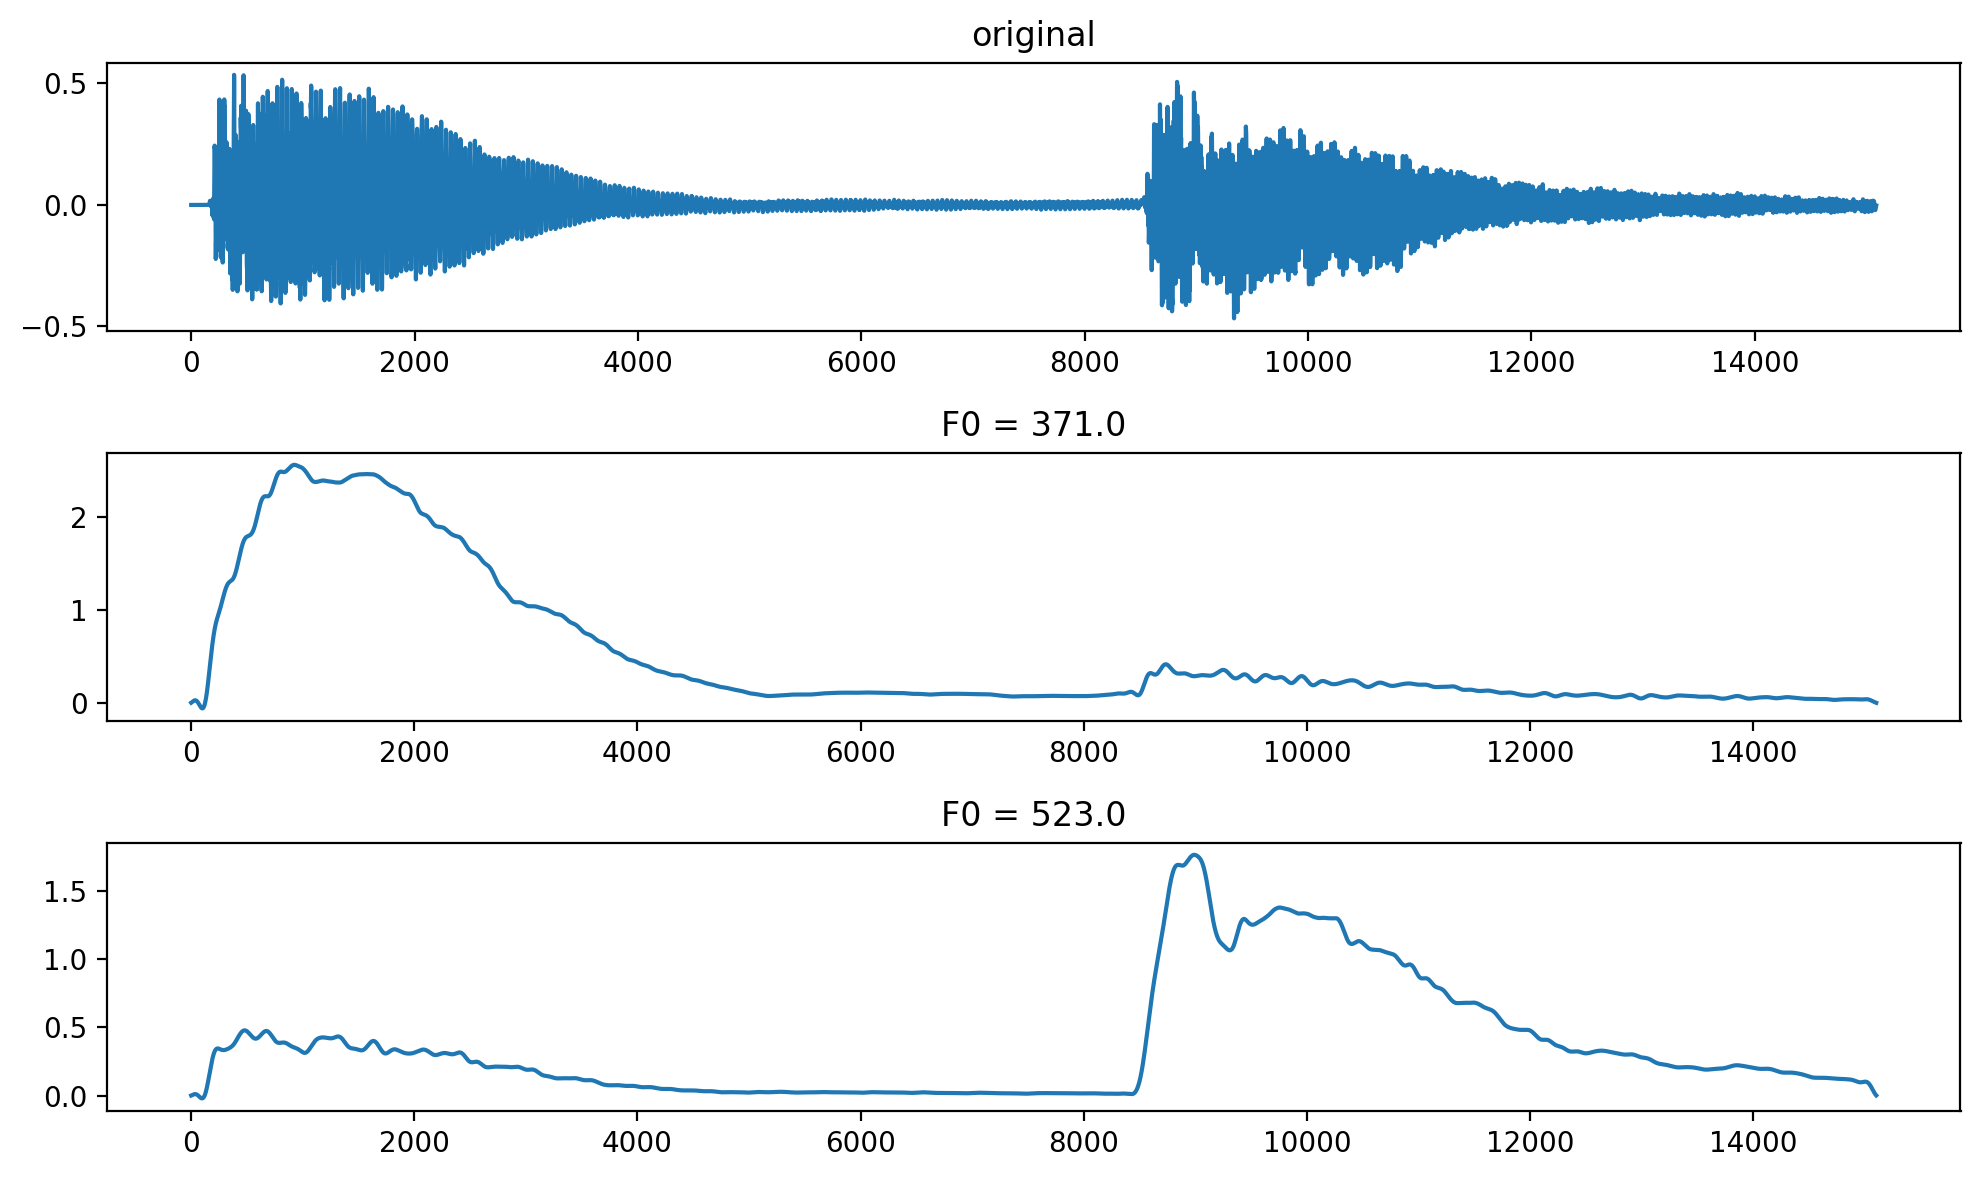

In [300]:
sr = 16000
from scipy.io.wavfile import read as wavread
from scipy.signal import resample_poly
srf,x = wavread( 'tri.wav')
print(srf)
x = x.astype( 'float32') / 33000
x = resample_poly( x, sr, srf)
x -= x.mean()
soundsc( x, sr)
x = torch.tensor(x)

comb = combnet.modules.Comb1d(1, 2, sr=sr, alpha=0.85)

comb.f.data = torch.tensor([[371.], [523.]])
# comb.f.data = torch.tensor([[410.], [523.]])

x = x[None, None]

# pooling parameters
kernel_size = 128
stride = kernel_size//2
padding = kernel_size // 2
n_pool_layers = 1
with torch.no_grad():

    # apply comb filter
    z = comb(x)
    
    for i in range(0, n_pool_layers): # try multiple pools instead of one large? Makes no difference for max_pool though
        z = torch.nn.functional.max_pool1d(z, stride=stride, kernel_size=kernel_size, padding=padding)
        # z = torchaudio.functional.resample(z, sr/stride, sr) # try resampling after every pool?
    # print(sr/(stride ** n_pool_layers))
    z = torchaudio.functional.resample(z, sr//(stride ** n_pool_layers), sr)
    # z = comb(z)

# display learned activations
nfft = 128
gcf().set_size_inches(10, 6)
gcf().add_subplot( 3, 1, 1, title='original').plot(x[0, 0])
gcf().add_subplot( 3, 1, 2, title='F0 = ' + str(comb.f.data[0,0].item())).plot(z[0, 0])
gcf().add_subplot( 3, 1, 3, title='F0 = ' + str(comb.f.data[1,0].item())).plot(z[0, 1])

gcf().tight_layout()
plt.show()
    
# Reconstruction?

# freqs = comb.f.data.squeeze() # possibly we want to learn these separately?
# times = torch.arange(0, z.shape[-1]/sr, 1./sr)[None]
# twopi = 2 * torch.pi # curse Archmides for choosing π≈3.14 and not π≈6.28
# y = torch.zeros_like(z)

# # naïve harmonic reconstruction
# n_harmonics = 12
# for k in range(1, n_harmonics+1):
#     y += 1/k * torch.sin(k*twopi*times*freqs[:, None])
# # plt.pcolormesh(y)
# y = z * y
# # soundsc(y[0].mean(0, keepdims=True), sr) # sum down to combine channels
# soundsc(y[0], sr) # don't sum down so the tones are more distinct
    
# print(x.shape, z.shape)
# soundsc(z[0], sr)

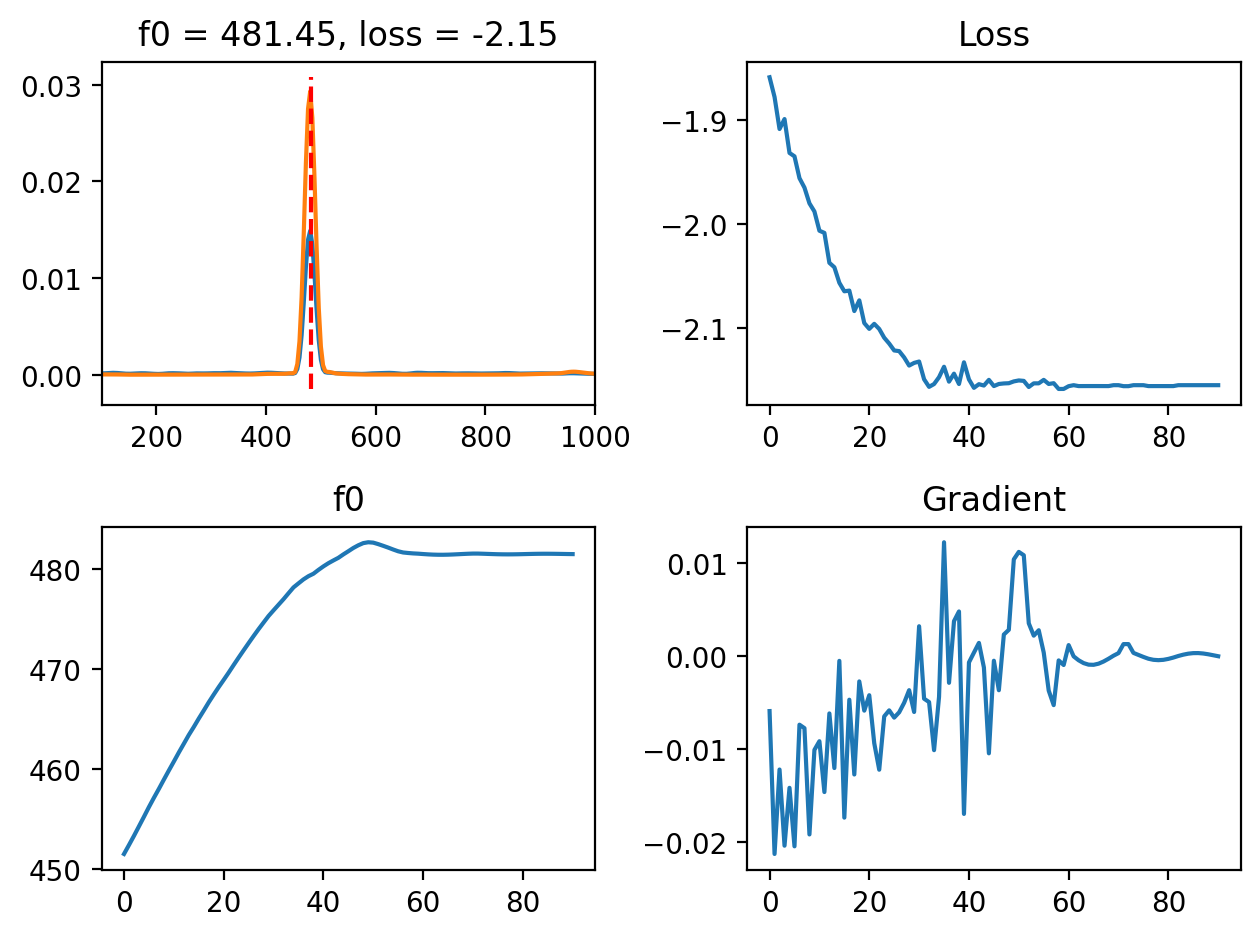

100%|██████████| 100/100 [00:04<00:00, 20.01it/s]


In [12]:
import torch.optim as optim

# Model to use
# comb = combnet.filters.fractional_comb_fiir
# comb = combnet.filters.fractional_comb_fir_multitap
comb = combnet.filters.fractional_comb_fir_multitap_sparse

# Input data
sr = 8000
x = torch.sin( 480*torch.linspace( 0, 2*torch.pi, sr)) + torch.randn( sr)

x = x[None]

# Optimizer and parameters
f0 = torch.tensor( 450.5).requires_grad_( True)
opt = torch.optim.Adam( [f0], lr=1)

# Forward/backward pass
# @compile
def train_step( f0, x):
    opt.zero_grad( set_to_none=True)
    y = comb( x, f0, .6, sr).squeeze()
    l = -y.std()
    l.backward( retain_graph=True)
    opt.step()
    return l, y.detach(), f0.grad

# Train
hl,hf,hg = [],[],[]
for j in trange( 100):
    l,y,g = train_step( f0, x)
    hl += [l.item()]
    hf += [f0.item()]
    hg += [g.item()]
    if j%10 == 0:
        gcf().clf()
        gcf().add_subplot( 2, 2, 1, title='Spectra')
        gca().plot( *welch( (x/x.std()).squeeze(), fs=sr, nperseg=512, nfft=2048), label='input')
        gca().plot( *welch( y/y.std(), fs=sr, nperseg=512, nfft=2048), label='response')
        gca().vlines( f0.detach(), *gca().get_ylim(), color='r', linestyle='--')
        gca().set_xlim( 100, 1000)
        gca().set_title( f'f0 = {f0.item():.2f}, loss = {l.item():.2f}')
        gcf().add_subplot( 2, 2, 3, title='f0').plot( hf)
        gcf().add_subplot( 2, 2, 2, title='Loss').plot( hl)
        gcf().add_subplot( 2, 2, 4, title='Gradient').plot( hg)
        gcf().tight_layout()
        drawnow()

In [90]:
import numpy as np
from tqdm.contrib import tenumerate

x, sr = torchaudio.load('tri.wav')

comb_fn = combnet.filters.fractional_comb_fir_multitap
# comb_fn = combnet.filters.fractional_comb_fiir

def loss(f):
    y = comb_fn( x, f, .7, sr).squeeze()
    return -y.std()

def grad(f):
    f.requires_grad = True
    l = loss(f)
    l.backward()
    g = f.grad.detach().squeeze()
    return -g

# Scan over solutions
print('scanning loss landscape and gradients')
# f = torch.linspace(100, 600, 200)
f = torch.linspace(200, 600, 200)
# f = torch.linspace(200, 400, 10)
# f = torch.linspace(360, 380, 20)
l2 = torch.zeros(len(f), len(f))
g_x = torch.zeros(len(f), len(f))
g_y = torch.zeros(len(f), len(f))
for i,f1 in tenumerate( f):
    # for j,f2 in tenumerate(f[i:]):
    for j,f2 in tenumerate(f):
        f0 = torch.tensor([[f1], [f2]])
        l2[i,j] = loss(f=f0).detach()
        # l2[i,j+i] = loss(f=f0).detach()
        # l2[j+i,i] = l2[i,j+i]
        g = grad(f=f0)
        # g_x[i,j+i] = g[0]
        # g_y[i,j+i] = g[1]
        g_x[i,j] = g[0]
        g_y[i,j] = g[1]

        
# f = f.detach()
# l2 = l2.detach()

# max_val = max(abs(g_x).max(), abs(g_y).max())

g_x /= max_val
g_y /= max_val

scanning loss landscape and gradients


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
gcf().set_size_inches(21, 15)
x_start = 0
y_start = 0
gcf().add_subplot(1, 1, 1, xlabel='f0_1', ylabel='f0_2', title=f'Loss surface')
colorbar(gca().pcolorfast(f[x_start:], f[y_start:], l2[x_start:, y_start:]))
arrow_stride = 2
gca().quiver(f[x_start::arrow_stride], f[y_start::arrow_stride], g_y[x_start::arrow_stride, y_start::arrow_stride], g_x[x_start::arrow_stride, y_start::arrow_stride], color='red')

# gcf().add_subplot(1, 2, 2, xlabel='f0_1', ylabel='f0_2', title=f'Gradient field')

# gca().quiver(f, f, g_x, g_y)

drawnow()

tensor(-0.0462)